In [2073]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

RANDOM_SEED = 42

In [2074]:
df = pd.read_csv("./../data/Ana_Health-Tabela_Modelo_Previsao_Churn.csv",skiprows=1)
df

,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
0,250,1971-04-01,64.0,82.0,São Paulo,São Paulo,04534-020,417.0,NaN,2021-01-28,...,2.0,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,317,1986-10-14,NaN,NaN,São Paulo,São Paulo,05421-050,NaN,NaN,2021-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,5948,1990-08-13,64.0,80.0,Bahia,Salvador,41830-120,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,50.0,0.0,0.0,0.0,False
1197,5949,1997-04-17,64.0,80.0,São Paulo,São Paulo,05014-001,NaN,NaN,2023-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1198,5951,1973-10-20,111.0,83.0,São Paulo,São Paulo,04883-190,412.0,NaN,2023-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1199,5954,1970-08-14,63.0,82.0,São Paulo,São Paulo,04513-100,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,120.0,0.0,0.0,0.0,False


In [2075]:
df.describe()

,id_person,id_gender,id_marrital_status,id_health_plan,id_person_recommendation,id_continuity_pf,Canal de Preferência,notes_count,done_activities_count,id_label,...,Mensagens Inbound,Mensagens Outbound,Ligações Inbound,Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência
count,1201.000000,1177.000000,1177.000000,524.000000,110.000000,395.000000,384.000000,1201.000000,1201.000000,103.000000,...,1090.000000,1157.000000,118.000000,579.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,3484.417985,63.729822,80.618522,417.921756,2555.736364,338.878481,244.635417,1.183181,10.129892,317.135922,...,75.367890,82.845290,3.144068,2.861831,6.325397,8.714286,94.484683,0.880952,0.250000,24.182738
std,1468.657350,3.354873,0.976647,129.712462,1213.154949,0.327144,25.618050,1.908686,8.938574,11.220647,...,103.861166,97.922535,8.482537,8.430147,4.803434,7.736556,32.399305,1.536318,0.821159,76.092674
min,250.000000,63.000000,80.000000,78.000000,321.000000,338.000000,238.000000,0.000000,0.000000,284.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,2399.000000,63.000000,80.000000,412.000000,1510.000000,339.000000,239.000000,0.000000,5.000000,313.000000,...,13.000000,19.000000,1.000000,1.000000,3.000000,3.000000,78.000000,0.000000,0.000000,0.000000
50%,3281.000000,64.000000,80.000000,412.000000,2379.000000,339.000000,239.000000,1.000000,8.000000,325.000000,...,40.000000,50.000000,1.000000,2.000000,5.000000,7.000000,88.000000,0.000000,0.000000,0.000000
75%,5115.000000,64.000000,82.000000,419.500000,3347.500000,339.000000,239.000000,2.000000,13.000000,325.000000,...,96.000000,110.000000,2.000000,3.000000,9.000000,12.000000,111.100000,1.000000,0.000000,0.000000
max,5956.000000,117.000000,83.000000,1164.000000,5556.000000,339.000000,360.000000,31.000000,137.000000,325.000000,...,1436.000000,1230.000000,80.000000,197.000000,30.000000,41.000000,383.750000,9.000000,7.000000,616.000000


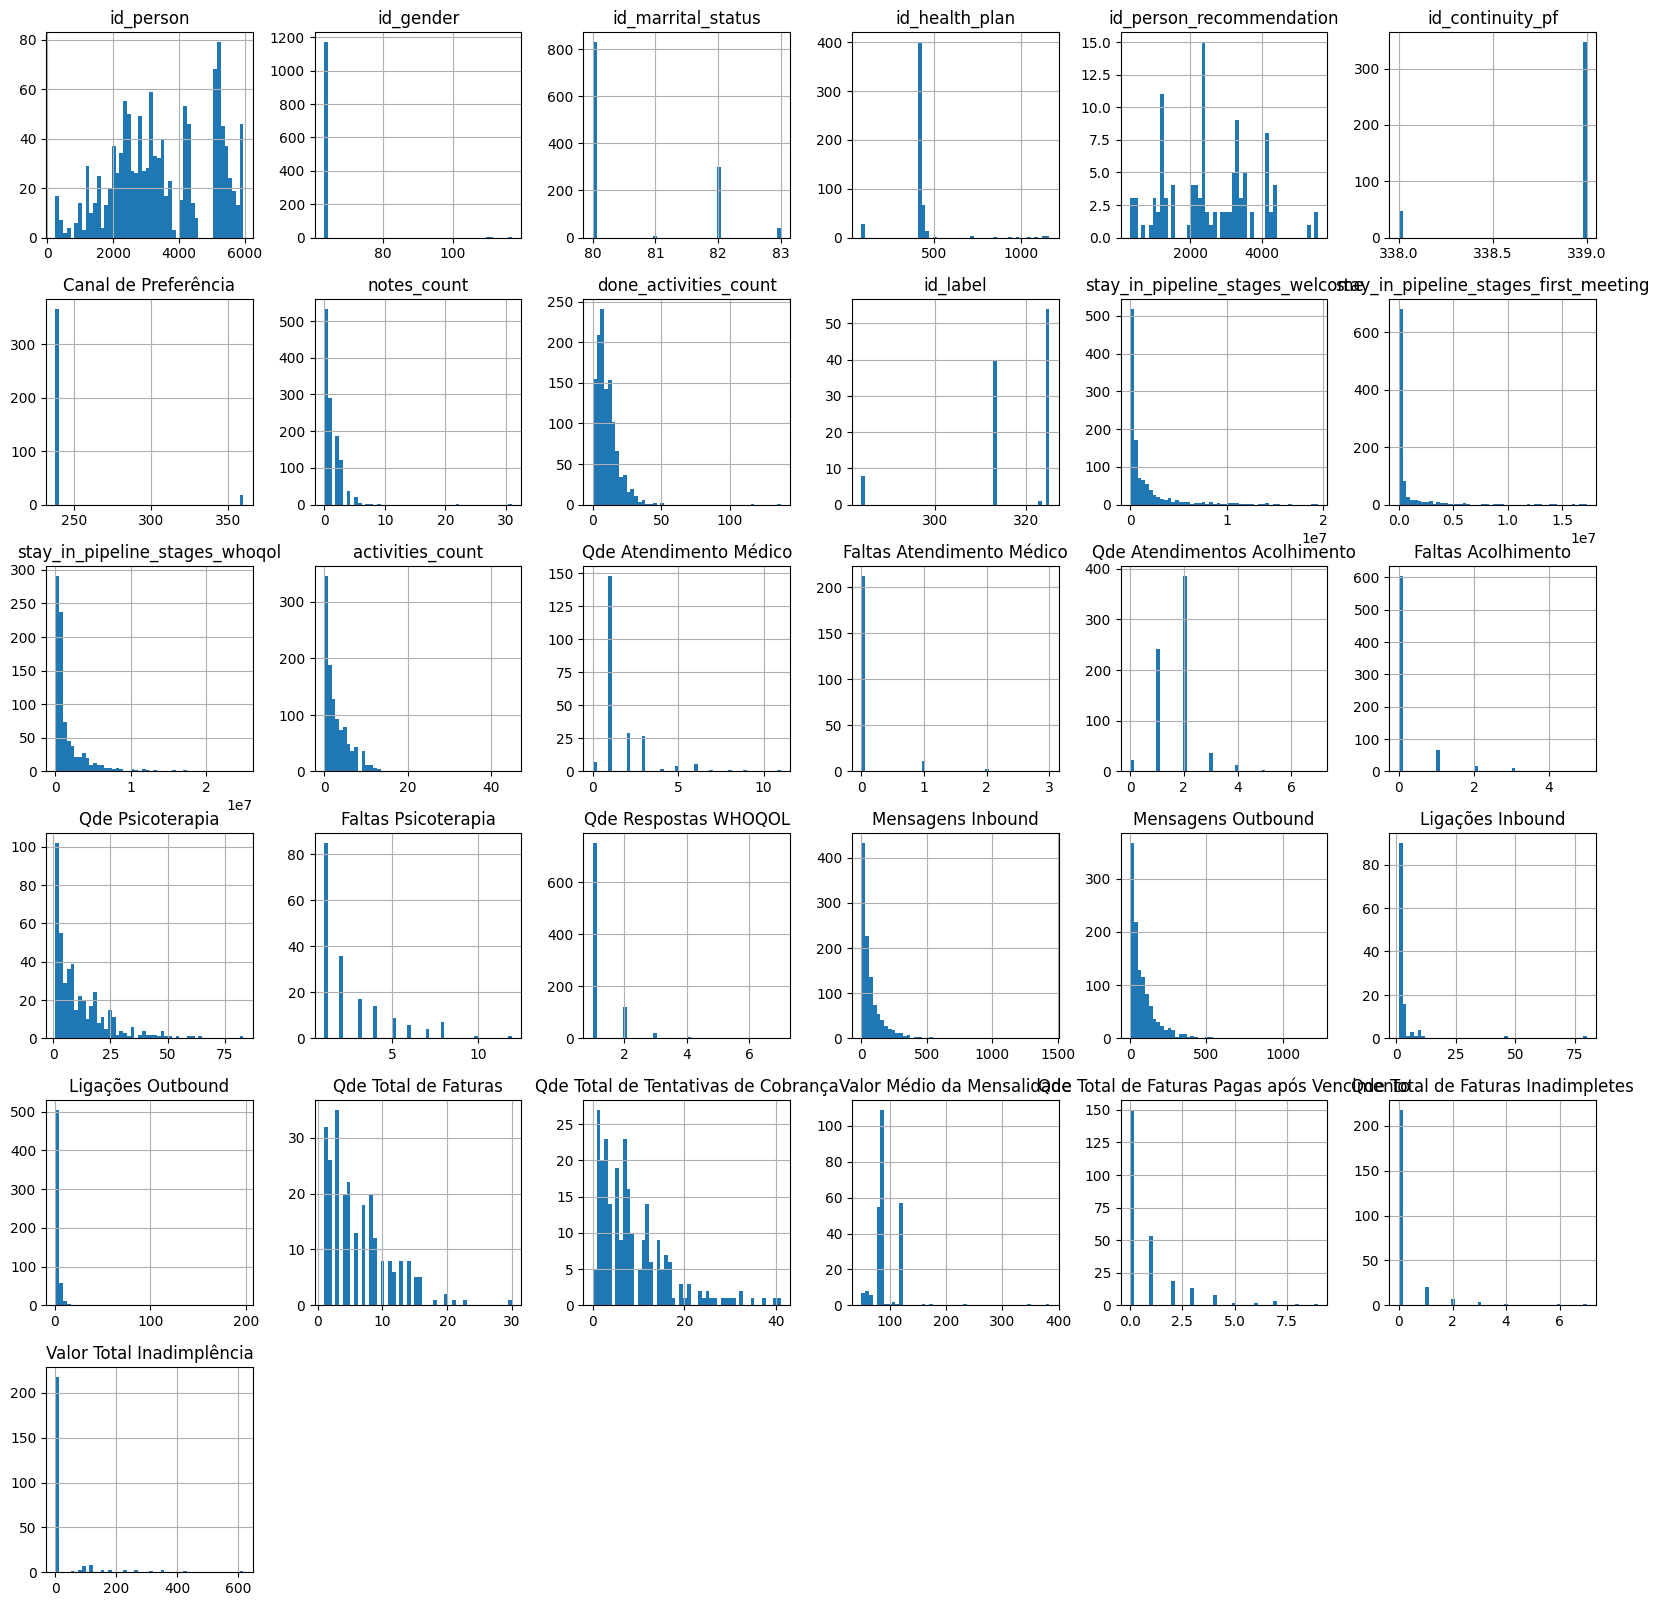

In [2076]:
df.hist(bins=50, figsize=(20,20))
plt.show()

Gráfico de dispersão para visualizar a relação entre a coluna de destino e outras colunas do conjunto de dados

# Análise Exploratória

In [2077]:
df_erik = df[['Qde Total de Faturas Inadimpletes', 'Cancelamentos Atendimento Médico', 'Problemas Abertos', 'Psicológico', 'Método de Pagamento', 'Mensagens Inbound', 'notes_count', 'Físico', 'Qde Atendimento Médico', 'id_marrital_status', 'id_org', 'start_of_service']]

df_leo = df[['Qde Prescrições', 'Ligações Outbound', 'Datas Acolhimento', 'id_stage', 'Data Última Mensagens Inbound', 'Faltas Atendimento Médico', 'Pontos de Atenção', 'activities_count', 'Recebe Comunicados?', 'Qde Total de Faturas', 'Data Última Ligações Inbound', 'id_gender']]

df_matheus = df[['Faltas Acolhimento', 'Qde Perfis de Pagamento Inativos', 'Datas Prescrição', 'Valor Total Inadimplência', 'id_continuity_pf', 'add_time', 'Qde Respostas WHOQOL', 'Datas Psicoterapia', 'Cancelamentos Acolhimento', 'won_time', 'Canal de Preferência', 'Ambiental']]

df_alfredo = df[['lost_reason.1', 'lost_reason', 'Mensagens Outbound', 'Datas Atendimento Médico', 'stay_in_pipeline_stages_whoqol', 'id_label', 'done_activities_count', 'state', 'Faltas Psicoterapia', 'Data Última Mensagens Outbound', 'Qde Atendimentos Acolhimento', 'status']]

df_gustavo = df[['Qde Total de Faturas Pagas após Vencimento', 'birthdate', 'Qde Psicoterapia', 'stay_in_pipeline_stages_first_meeting', 'status.1', 'Data Última Ligações Outbound', 'lost_time', 'Ligações Inbound', 'Qde Total de Tentativas de Cobrança', 'Cancelamentos Psicoterapia', 'Faltas Todos Atendimento', 'Valor Médio da Mensalidade']]

df_marcelo = df[['Interesses', 'id_health_plan', 'Cancelamentos Todos Atendimento', 'id_person', 'Social', 'city', 'id_person_recommendation', 'postal_code', 'contract_start_date', 'lost_time.1', 'contract_end_date', 'stay_in_pipeline_stages_welcome']]

## Erik

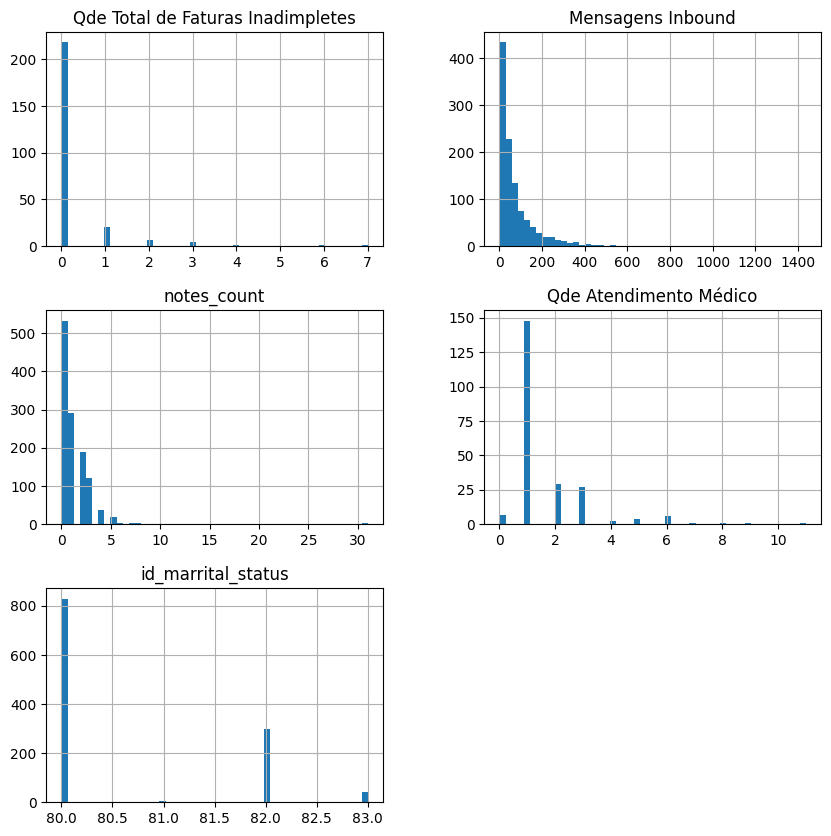

In [2078]:
df_erik.hist(bins=50, figsize=(10,10))
plt.show()

In [2079]:
df_erik["notes_count"].value_counts()

0     533
1     290
2     188
3     122
4      37
5      20
6       3
31      2
8       2
7       2
22      1
9       1
Name: notes_count, dtype: int64

Qtd total de faturas inadimplentes: Mudar para bool ou 1 e 0. Considerando apenas dois grupos, já teve inadimplente ou nunca teve inadimplente

In [2080]:
df_erik["Qde Total de Faturas Inadimpletes"].value_counts()

0.0    218
1.0     20
2.0      7
3.0      4
4.0      1
6.0      1
7.0      1
Name: Qde Total de Faturas Inadimpletes, dtype: int64

Cancelamentos Atendimento Médico: Excluir colunas "Cancelamento Atendimento Médico" e coluna "Qde Atendimento Médico". Pois estão sem dados coletados.

In [2081]:
colunas_bool = df_erik.select_dtypes(include='bool').columns
df_erik[colunas_bool].describe().transpose()

,count,unique,top,freq
Cancelamentos Atendimento Médico,1201,1,False,1201


In [2082]:
colunas_object = df_erik.select_dtypes(include='object').columns
df_erik[colunas_object].describe().transpose()

,count,unique,top,freq
Problemas Abertos,610,548,ansiedade P01 (CIAP-2),11
Psicológico,898,130,4,275
Método de Pagamento,252,4,Cartão de crédito,227
Físico,898,139,"3,90",64
id_org,886,60,2457,123
start_of_service,1065,420,2023-06-12,44


Problemas Abertos: MUITO diverso, agrupar de alguma forma? 

In [2083]:
df_erik["Problemas Abertos"].describe()

count                        610
unique                       548
top       ansiedade P01 (CIAP-2)
freq                          11
Name: Problemas Abertos, dtype: object

Também apresenta uma grande diversidade de dados, agrupar por categorias?

In [2084]:
df_erik["Psicológico"].value_counts()

4                275
3                247
2                 58
5                 43
3,3               16
                ... 
3,7; 4,0; 3,3      1
3,2; 3,3; 3,3      1
3,7; 3,2           1
4,2; 4,7           1
3,2; 3,2           1
Name: Psicológico, Length: 130, dtype: int64

In [2085]:
df_erik["Método de Pagamento"].value_counts()

Cartão de crédito    227
Dinheiro              15
Boleto YaPay           9
Pix                    1
Name: Método de Pagamento, dtype: int64

In [2086]:
df_erik["Físico"].value_counts()

3,90        64
3,70        63
4,10        63
4,00        59
3,60        58
            ..
4,4; 4,1     1
3,6; 4,9     1
4,0; 4,9     1
4,3; 4,7     1
3,4; 3,4     1
Name: Físico, Length: 139, dtype: int64

In [2087]:
df_erik["id_marrital_status"].value_counts()

80.0    830
82.0    299
83.0     41
81.0      7
Name: id_marrital_status, dtype: int64

Id Org talvez não seja necessário, pois não é necessário o identificador da empresa para prever os cancelamentos.

In [2088]:
df_erik["id_org"].value_counts()

2457          123
1436          104
448            98
2458           50
1251           46
1731           38
1210           32
1994           28
2319           26
438            25
1166           24
1271           23
1622           21
2391           21
1589           18
2503           17
1948           16
434            16
456            15
1538           13
1450           11
2420           11
1847           11
1047            9
382             8
2389            7
2273            6
1948; 1948      5
1348            5
929             4
1164            4
1812            4
1393            4
1023            4
1495            3
1483            3
2388            3
448; 448        3
1924            3
2430            2
1174            2
2393            2
2509            1
2505            1
1948; 2389      1
1677; 1677      1
2372            1
1204            1
1822            1
1251; 1251      1
1495; 1495      1
1182            1
1519            1
1436; 1436      1
1602            1
619; 619  

Talvez seja interessante agrupar os dados por mês, para ver se existe alguma sazonalidade.

In [2089]:
df_erik["start_of_service"].value_counts()

2023-06-12                44
2022-03-04                38
2023-06-14                25
2022-08-01                22
2023-06-13                20
                          ..
2022-06-09; 2023-03-16     1
2022-06-06                 1
2022-06-03                 1
2022-06-01; 2022-12-26     1
2023-11-08                 1
Name: start_of_service, Length: 420, dtype: int64

## Leo

In [2090]:
df_leo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Qde Prescrições                1201 non-null   bool   
 1   Ligações Outbound              579 non-null    float64
 2   Datas Acolhimento              679 non-null    object 
 3   id_stage                       1078 non-null   object 
 4   Data Última Mensagens Inbound  1090 non-null   object 
 5   Faltas Atendimento Médico      227 non-null    float64
 6   Pontos de Atenção              62 non-null     object 
 7   activities_count               1116 non-null   float64
 8   Recebe Comunicados?            62 non-null     object 
 9   Qde Total de Faturas           252 non-null    float64
 10  Data Última Ligações Inbound   118 non-null    object 
 11  id_gender                      1177 non-null   float64
dtypes: bool(1), float64(5), object(6)
memory usage: 

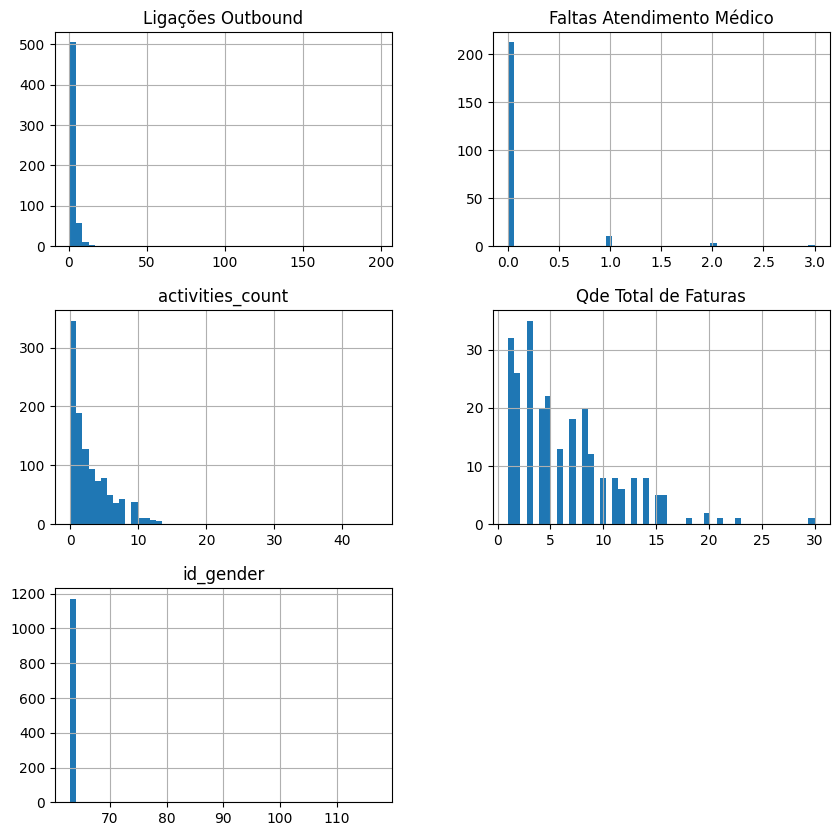

In [2091]:
df_leo.hist(bins=50, figsize=(10,10))
plt.show()

### Ligações Outbound

In [2092]:
ligacoes_outbound = df_leo['Ligações Outbound']

In [2093]:
vc = ligacoes_outbound.value_counts()
vc

1.0      240
2.0      145
3.0       81
4.0       39
5.0       22
6.0       20
7.0       12
9.0        5
8.0        4
10.0       3
12.0       2
14.0       2
11.0       1
197.0      1
16.0       1
31.0       1
Name: Ligações Outbound, dtype: int64

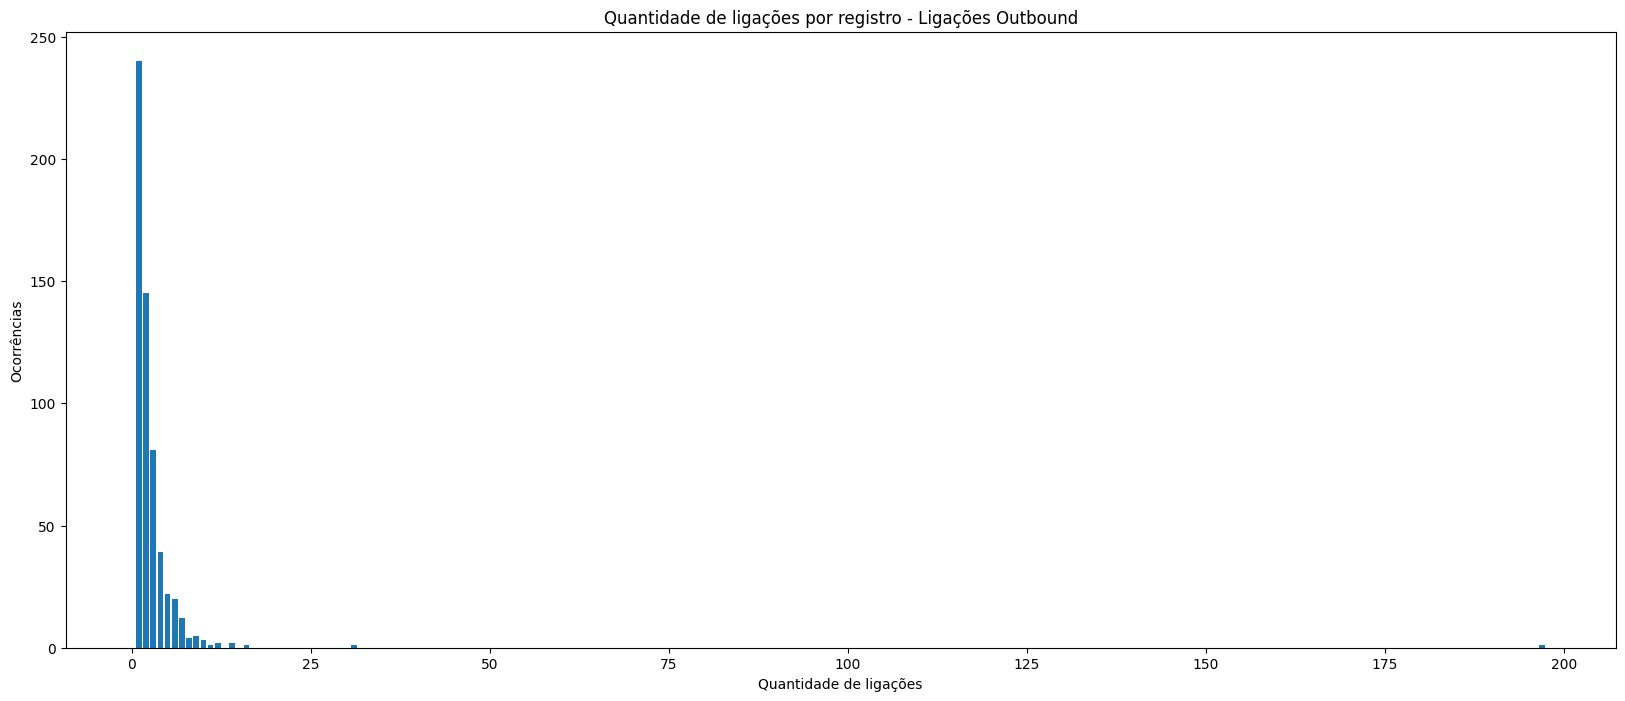

In [2094]:
plt.figure(figsize=(20,8))
plt.bar(vc.index, vc.values) 
plt.xlabel('Quantidade de ligações')
plt.ylabel('Ocorrências')
plt.title('Quantidade de ligações por registro - Ligações Outbound')
plt.show()

### activities_count

In [2095]:
activities_count = df_leo['activities_count']


In [2096]:

vc = activities_count.value_counts()
vc

0.0     346
1.0     189
2.0     128
3.0      93
5.0      79
4.0      74
6.0      49
8.0      43
9.0      37
7.0      36
11.0     11
10.0     11
12.0      7
13.0      5
45.0      1
15.0      1
22.0      1
17.0      1
30.0      1
20.0      1
18.0      1
14.0      1
Name: activities_count, dtype: int64

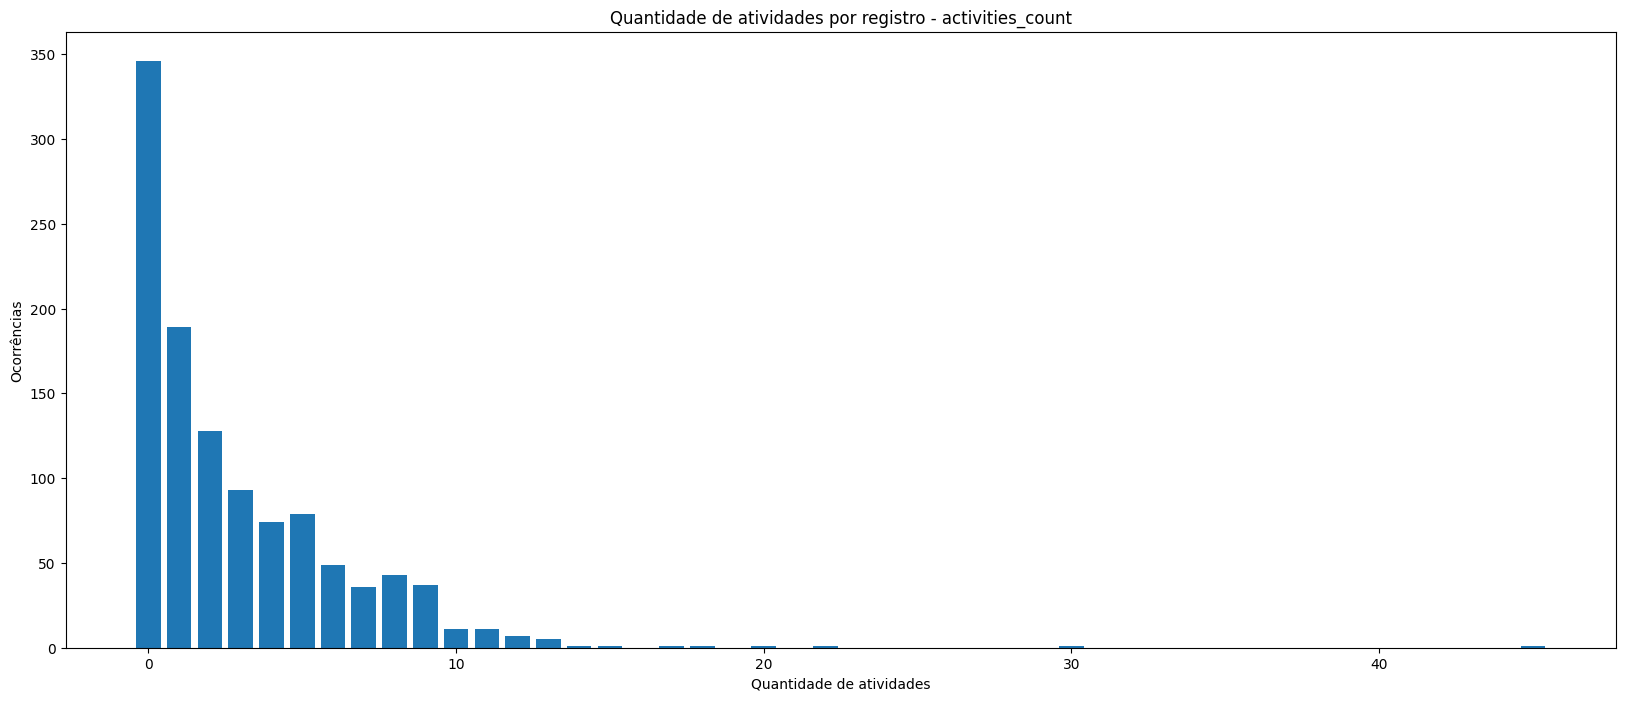

In [2097]:
plt.figure(figsize=(20,8))
plt.bar(vc.index, vc.values)
plt.xlabel('Quantidade de atividades')
plt.ylabel('Ocorrências')
plt.title('Quantidade de atividades por registro - activities_count')
plt.show()

### Qde Total de Faturas

In [2098]:
qde_total_faturas = df_leo['Qde Total de Faturas']

In [2099]:
vc = qde_total_faturas.value_counts()
vc

3.0     35
1.0     32
2.0     26
5.0     22
8.0     20
4.0     20
7.0     18
6.0     13
9.0     12
10.0     8
11.0     8
13.0     8
14.0     8
12.0     6
16.0     5
15.0     5
20.0     2
21.0     1
23.0     1
18.0     1
30.0     1
Name: Qde Total de Faturas, dtype: int64

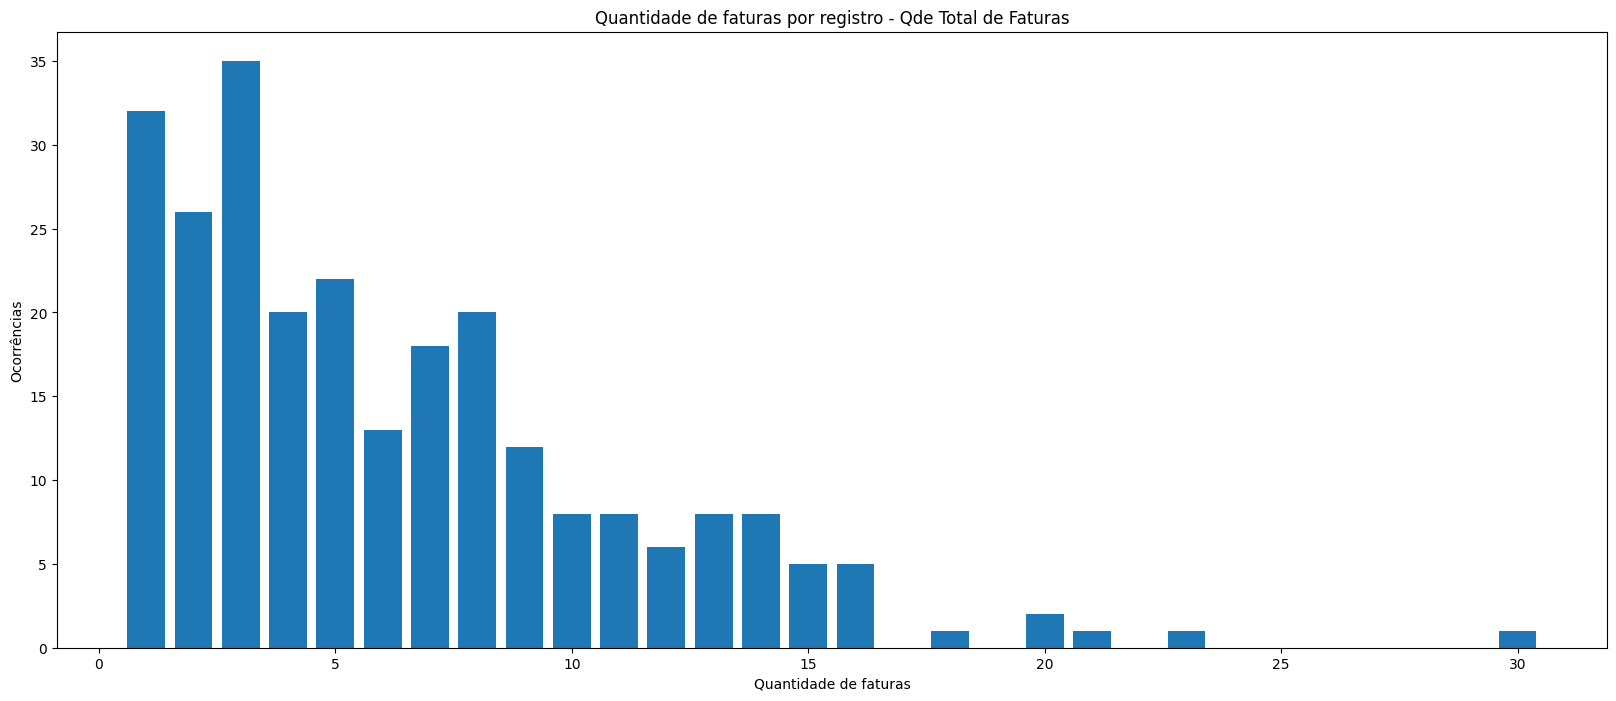

In [2100]:
plt.figure(figsize=(20,8))
plt.bar(vc.index, vc.values)
plt.xlabel('Quantidade de faturas')
plt.ylabel('Ocorrências')
plt.title('Quantidade de faturas por registro - Qde Total de Faturas')

plt.show()

Correlação entre as features

In [2101]:
df_leo_corr = df_leo.drop(['Qde Prescrições', 'Datas Acolhimento', 'Faltas Atendimento Médico'], axis=1)    # retirando as features que não são numéricas
corr_matrix = df_leo_corr.corr()
corr_matrix

/var/folders/8p/rd093x_n5d11j0n2nz5zfzhh0000gn/T/ipykernel_16047/1095395754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_leo_corr.corr()


,Ligações Outbound,activities_count,Qde Total de Faturas,id_gender
Ligações Outbound,1.000000,0.009544,0.286932,-0.014417
activities_count,0.009544,1.000000,0.077818,-0.019529
Qde Total de Faturas,0.286932,0.077818,1.000000,0.046366
id_gender,-0.014417,-0.019529,0.046366,1.000000


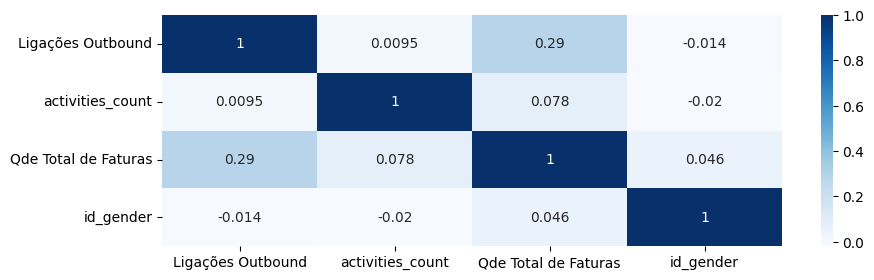

In [2102]:
plt.figure(figsize=(10,3))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

In [2103]:
df_leo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Qde Prescrições                1201 non-null   bool   
 1   Ligações Outbound              579 non-null    float64
 2   Datas Acolhimento              679 non-null    object 
 3   id_stage                       1078 non-null   object 
 4   Data Última Mensagens Inbound  1090 non-null   object 
 5   Faltas Atendimento Médico      227 non-null    float64
 6   Pontos de Atenção              62 non-null     object 
 7   activities_count               1116 non-null   float64
 8   Recebe Comunicados?            62 non-null     object 
 9   Qde Total de Faturas           252 non-null    float64
 10  Data Última Ligações Inbound   118 non-null    object 
 11  id_gender                      1177 non-null   float64
dtypes: bool(1), float64(5), object(6)
memory usage: 

### Variáveis categóricas

#### Dates

In [2104]:
df_leo['Data Última Mensagens Inbound'] = pd.to_datetime(df_leo['Data Última Mensagens Inbound'])
df_leo['Data Última Ligações Inbound'] = pd.to_datetime(df_leo['Data Última Ligações Inbound'])

df_leo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Qde Prescrições                1201 non-null   bool          
 1   Ligações Outbound              579 non-null    float64       
 2   Datas Acolhimento              679 non-null    object        
 3   id_stage                       1078 non-null   object        
 4   Data Última Mensagens Inbound  1090 non-null   datetime64[ns]
 5   Faltas Atendimento Médico      227 non-null    float64       
 6   Pontos de Atenção              62 non-null     object        
 7   activities_count               1116 non-null   float64       
 8   Recebe Comunicados?            62 non-null     object        
 9   Qde Total de Faturas           252 non-null    float64       
 10  Data Última Ligações Inbound   118 non-null    datetime64[ns]
 11  id_gender        

/var/folders/8p/rd093x_n5d11j0n2nz5zfzhh0000gn/T/ipykernel_16047/2292309337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_leo['Data Última Mensagens Inbound'] = pd.to_datetime(df_leo['Data Última Mensagens Inbound'])
/var/folders/8p/rd093x_n5d11j0n2nz5zfzhh0000gn/T/ipykernel_16047/2292309337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_leo['Data Última Ligações Inbound'] = pd.to_datetime(df_leo['Data Última Ligações Inbound'])


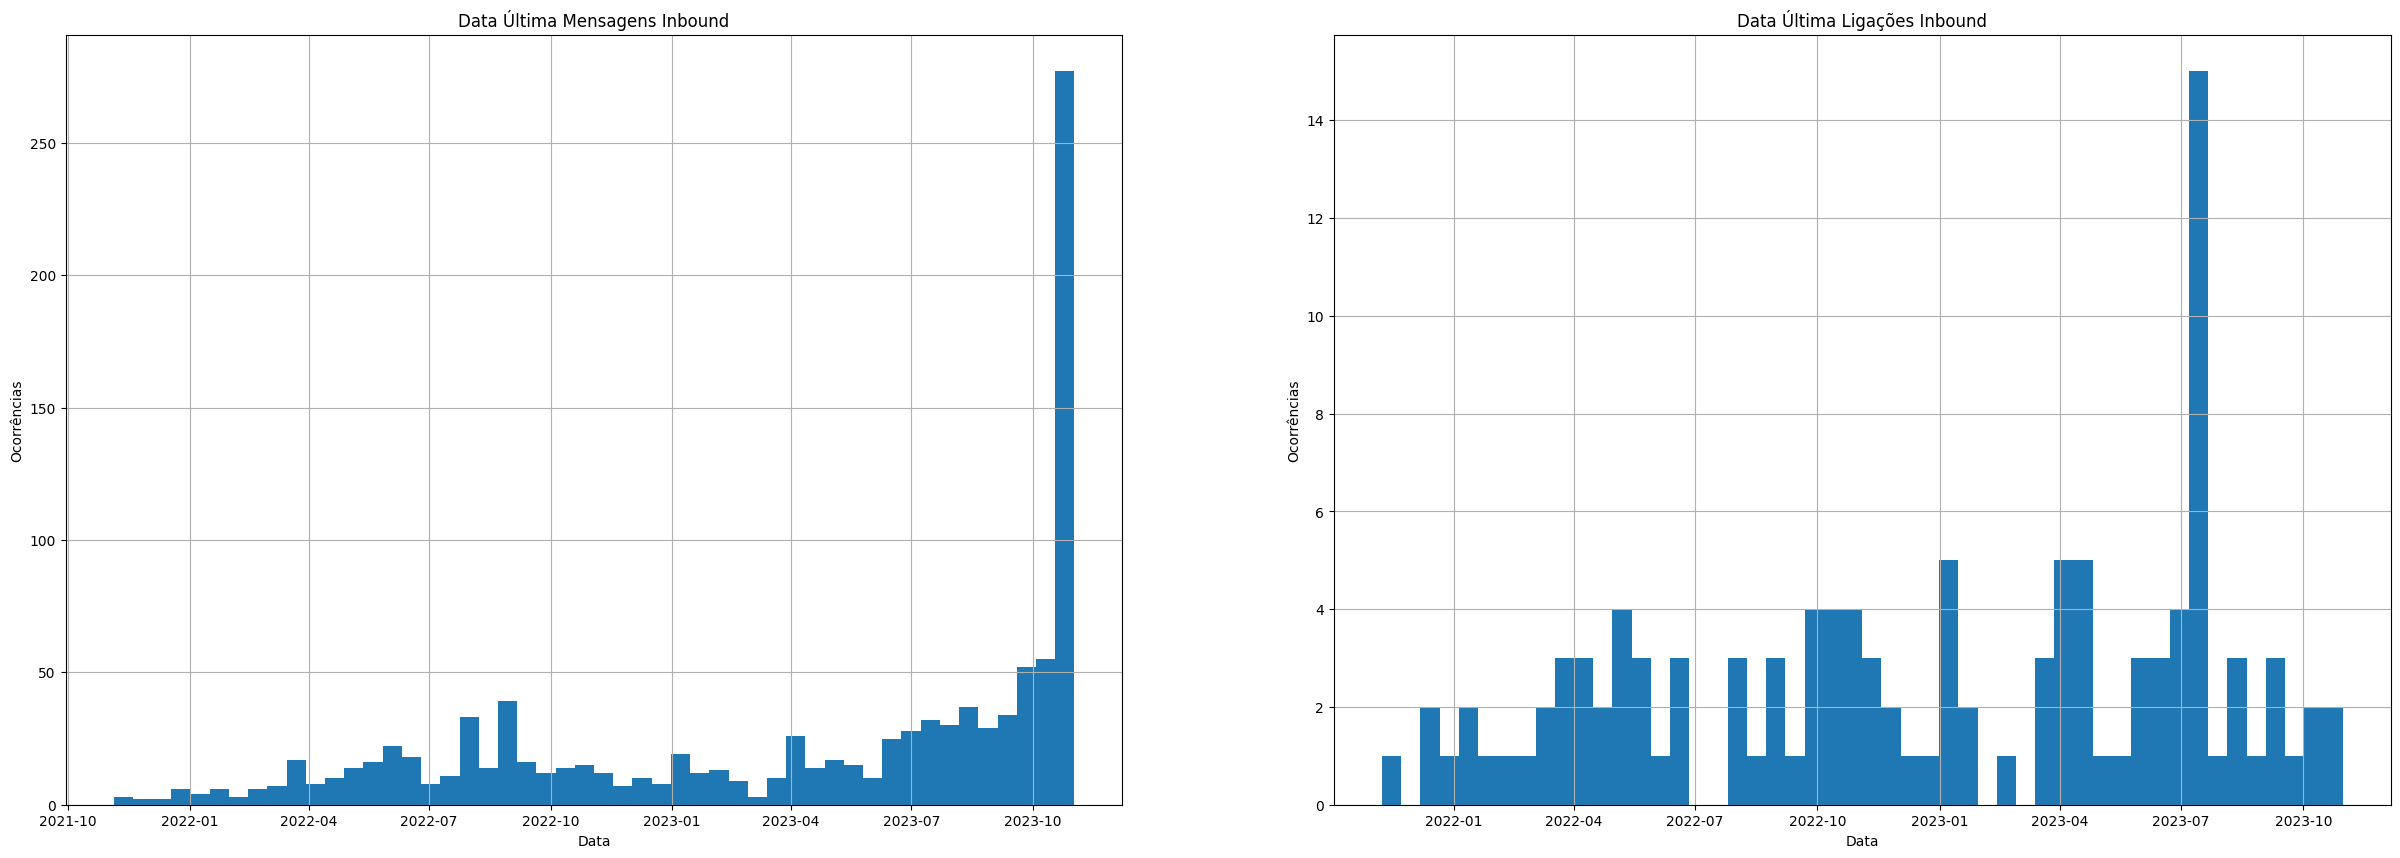

In [2105]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

# plot 1
df_leo['Data Última Mensagens Inbound'].hist(ax=ax[0], bins=50)
ax[0].set_title('Data Última Mensagens Inbound')

# plot 2
df_leo['Data Última Ligações Inbound'].hist(ax=ax[1], bins=50)
ax[1].set_title('Data Última Ligações Inbound')

# xlabel e ylabel
for i in range(2):
    ax[i].set_xlabel('Data')
    ax[i].set_ylabel('Ocorrências')

plt.show()

#### Recebe Comunicados?

In [2106]:
df_leo['Recebe Comunicados?'].value_counts()

False    62
Name: Recebe Comunicados?, dtype: int64

#### Pontos de Atenção

In [2107]:
df_leo['Pontos de Atenção'].value_counts()

False    62
Name: Pontos de Atenção, dtype: int64

#### id_stage

In [2108]:
df['id_stage'].value_counts()

for linha in df['id_stage'].value_counts().index:
    try:
        # verifica se o formato já está em int
        print(f"{linha} - {int(linha)}")
    except:
        array = linha.split('; ')
        for i in range(len(array)):
            array[i] = int(array[i])
        print(f"{linha} - {array}")



65 - 65
64 - 64
65; 64 - [65, 64]
65; 66; 64 - [65, 66, 64]
64; 65 - [64, 65]
65; 66 - [65, 66]
64; 64 - [64, 64]
65; 65 - [65, 65]
66 - 66
65; 66; 64; 64 - [65, 66, 64, 64]
65; 64; 64; 64 - [65, 64, 64, 64]
64; 66 - [64, 66]


### Insights

- **Datas Acolhimento**: a coluna possui todos os valores setados como False, logo por enquanto não entrou na análise. O mesmo vale para a coluna **Faltas Atendimento Médico**, **Recebe Comunicados?** e **Pontos de Atenção**.

- **id_gender**: a coluna possui dois valores possíveis (63 e 64), que representam os gêneros masculino e feminino. A dúvida consiste em qual valor representa qual gênero.

- **Pontos de Atenção**: a coluna possui apenas 62 valores não-nulos, o que representa uma porção muito pequena do total de dados possíveis (1202)

- **id_stage**: a coluna, que representa o tipo de organização por assinatura (PJ, PF ou Acolimento Desemprego), possui casos onde existem mais de 1 tipo de identificador para a mesma pessoa, como por exemplo na linha "66; 65; 64". A dúvida consiste em como tratar esses casos.

- **Data Última Mensagens Inbound** e **Data Última Mensagens Outbound**: ao plotar o gráfico das duas features, foi possível notar um aumento nos dois casos mais perto do fim do ano. A dúvida consiste em se esse aumento é sazonal ou não, ou seja, se é apenas uma coincidência ou se existe algum motivo para esse aumento.

- No geral as colunas possuem muitos dados faltantes, a questão consiste em como tratá-los, seja excluindo as colunas ou preenchendo os valores faltantes com algum valor.

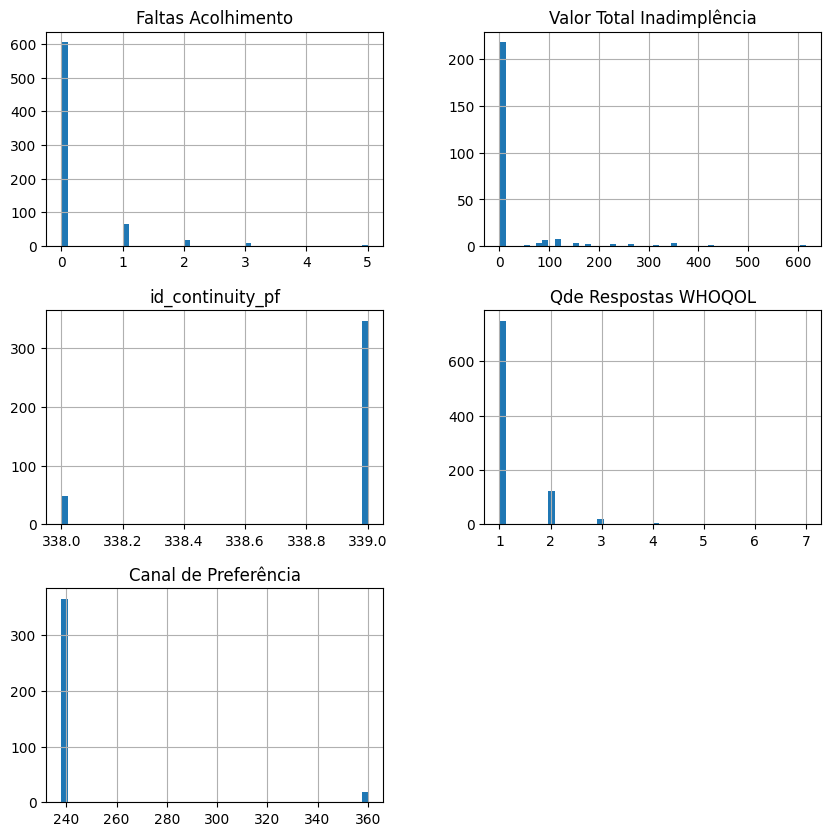

In [2109]:
df_matheus.hist(bins=50, figsize=(10,10))
plt.show()

## Análises - Alfredo

array([[<AxesSubplot: title={'center': 'Mensagens Outbound'}>,
        <AxesSubplot: title={'center': 'stay_in_pipeline_stages_whoqol'}>],
       [<AxesSubplot: title={'center': 'id_label'}>,
        <AxesSubplot: title={'center': 'done_activities_count'}>],
       [<AxesSubplot: title={'center': 'Faltas Psicoterapia'}>,
        <AxesSubplot: title={'center': 'Qde Atendimentos Acolhimento'}>]],
      dtype=object)

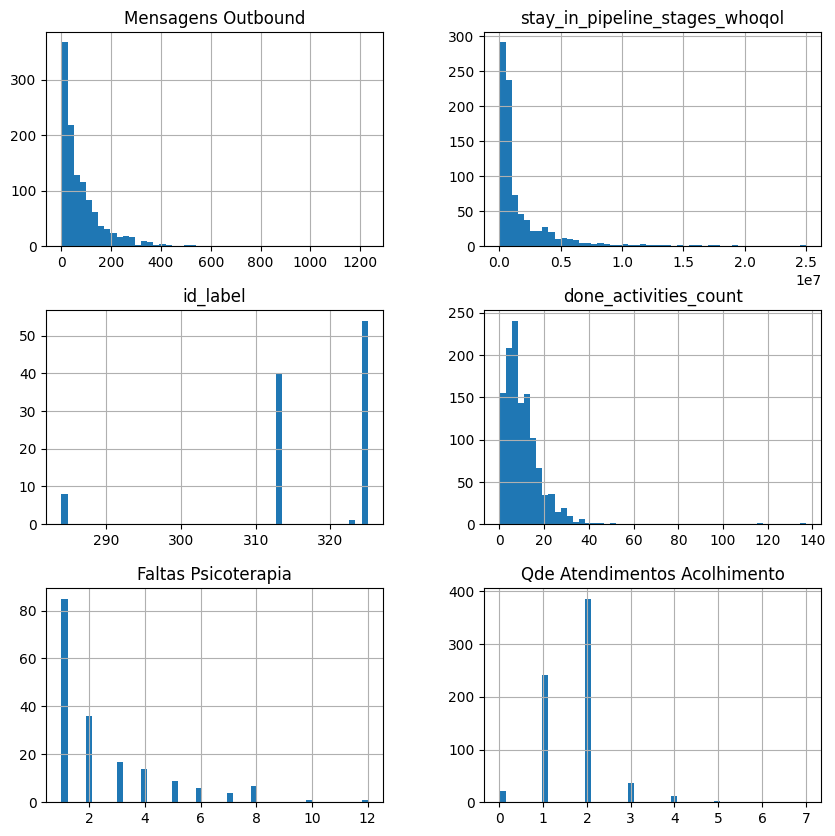

In [2110]:
df_alfredo.hist(bins=50, figsize=(10,10))

### lost_reason.1 - Onboarding

Motivo pelo qual a pessoa não concluiu o processo de onboarding.

In [2111]:
df['lost_reason.1'].dropna()

1                                     Cancelou assinatura
6                                     Cancelou assinatura
9       [Onboarding] Não retornou aos contatos de resgate
17      [Onboarding] Não tem interesse em seguir nas e...
23      [Onboarding] Não tem interesse em seguir nas e...
                              ...                        
1121    [Onboarding] Não retornou aos contatos de resgate
1125    [Onboarding] Não retornou aos contatos de resgate
1128    [Onboarding] Não retornou aos contatos de resgate
1130    [Onboarding] Não retornou aos contatos de resgate
1147    [Onboarding] Não retornou aos contatos de resgate
Name: lost_reason.1, Length: 317, dtype: object

### lost_reason - Assinatura

Motivo do cancelamento por assinatura (separada por vírgula).

In [2112]:
df['lost_reason'].dropna()

24                 [Assinatura] Não quer seguir com a Ana
28                    [Assinatura] Precisou cortar custos
30      [Assinatura] Cancelamento após saída da psicot...
36       [Assinatura] Empresa cancelou o benefício da Ana
37                     Empresa está encerrando a operação
                              ...                        
1109                  [Assinatura] Precisou cortar custos
1111               [Assinatura] Não quer seguir com a Ana
1113                            [Assinatura] Desligamento
1119                            [Assinatura] Desligamento
1132                            [Assinatura] Desligamento
Name: lost_reason, Length: 520, dtype: object

### Mensagens Outbound - 

Contagem de mensagens enviadas pela equipe de saúde. Pode ser interessante ver q quantidade ao longo do tempo, assim, mostrando como que o cuidado vai evoluindo com o passar do tempo, mas, não temos acesso ao log de mensagens por dia, apenas por cliente.

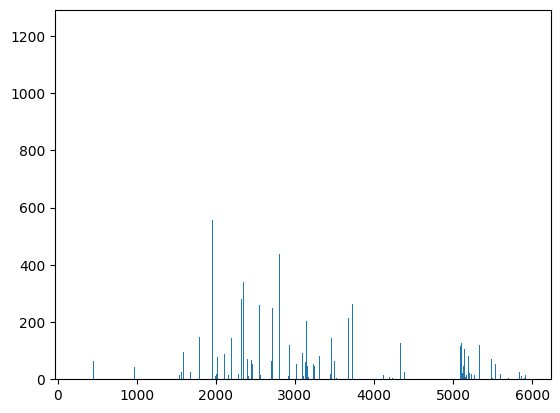

In [2113]:
plt.bar(df['id_person'],df['Mensagens Outbound'])
plt.show()

In [2114]:
print("Media de mensagens enviadas pela equipe de saude: ", df['Mensagens Outbound'].mean())
print("Primeiro quartil de mensagens enviadas: ", df['Mensagens Outbound'].quantile(0.25))
print("Quartil superior de mensagens enviadas: ", df['Mensagens Outbound'].quantile(0.75))

Media de mensagens enviadas pela equipe de saude:  82.84528954191876
Primeiro quartil de mensagens enviadas:  19.0
Quartil superior de mensagens enviadas:  110.0


### Datas Atendimento Médico - 
Data dos atendimentos com a equipe médica. Importante ver a quantidade de atendimentos por cliente ou empresa que existem.


In [2115]:
df['Datas Atendimento Médico']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1196    NaN
1197    NaN
1198    NaN
1199    NaN
1200    NaN
Name: Datas Atendimento Médico, Length: 1201, dtype: object

In [2116]:
df[df['Datas Atendimento Médico']!=False]

,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
0,250,1971-04-01,64.0,82.0,São Paulo,São Paulo,04534-020,417.0,NaN,2021-01-28,...,2.0,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,317,1986-10-14,NaN,NaN,São Paulo,São Paulo,05421-050,NaN,NaN,2021-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,5948,1990-08-13,64.0,80.0,Bahia,Salvador,41830-120,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,50.0,0.0,0.0,0.0,False
1197,5949,1997-04-17,64.0,80.0,São Paulo,São Paulo,05014-001,NaN,NaN,2023-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1198,5951,1973-10-20,111.0,83.0,São Paulo,São Paulo,04883-190,412.0,NaN,2023-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1199,5954,1970-08-14,63.0,82.0,São Paulo,São Paulo,04513-100,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,120.0,0.0,0.0,0.0,False


**Coluna completamente nula**

### stay_in_pipeline_stages_whoqol - 

Tempo até a realização da atendimento para pactuar a jornada de cuidados. Não sabemos qual a unidade de medida de tempo utilizada.

In [2117]:
df['stay_in_pipeline_stages_whoqol']

len(df['stay_in_pipeline_stages_whoqol'].dropna())

864

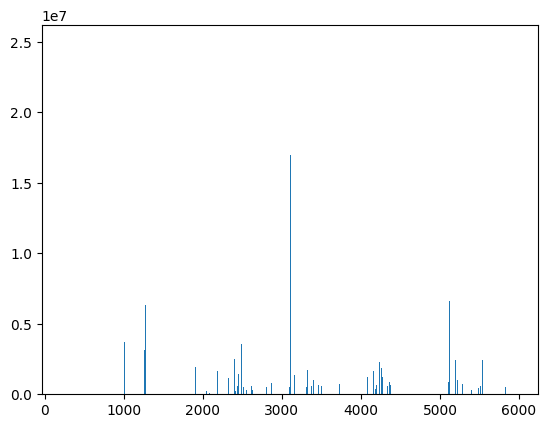

In [2118]:
filtro = pd.notna(df['stay_in_pipeline_stages_whoqol'])

users_fizeram = df[filtro]['id_person']
tempo_testes_feitos = df[filtro]['stay_in_pipeline_stages_whoqol']

plt.bar(users_fizeram, tempo_testes_feitos)
plt.show()

O que é possível ver são tempos muito altos (já que a escala está relativa), indicando uma possível demora para realizar o teste de satisfação com a própria vida.

### id_label - 

Identificador do status do agendamento durante o processo de onboarding: Convera Agendada, Reagendar.

Só há 103 valores não nulos e não sabemos o valor associado aos números presentes na coluna (cada um representa uma classe).


<AxesSubplot: >

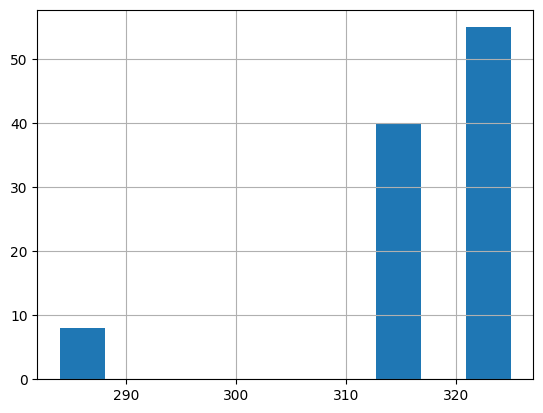

In [2119]:
df['id_label'].hist()

In [2120]:
df['id_label'].dropna()

38      284.0
69      325.0
78      284.0
81      284.0
137     323.0
        ...  
1181    313.0
1188    313.0
1190    313.0
1192    313.0
1197    313.0
Name: id_label, Length: 103, dtype: float64

### done_activities_count - 

Contagem das atividades concluídas relacionada à pessoa. Algo a ser levado em consideração quando analisarmos quais os clientes propícios a cancelar é o quanto eles usufruíram dos serviços antes do término.

In [2121]:
df['done_activities_count']

0       8
1       4
2       0
3       0
4       0
       ..
1196    0
1197    0
1198    0
1199    0
1200    0
Name: done_activities_count, Length: 1201, dtype: int64

<AxesSubplot: >

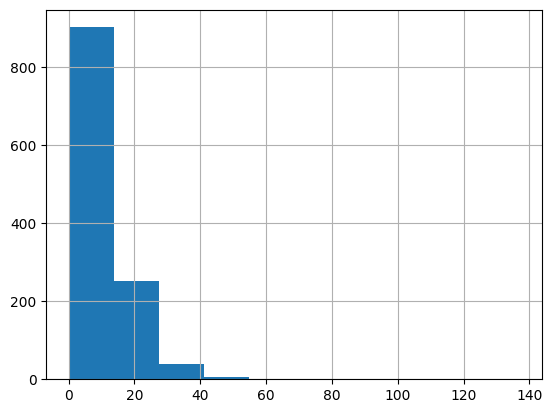

In [2122]:
df['done_activities_count'].hist()

In [2123]:
print("Primeiro quaril de atividades: ",df['done_activities_count'].quantile(0.25))
print("Quartil superior do número de ativiaddes feitas: ",df['done_activities_count'].quantile(0.75))

Primeiro quaril de atividades:  5.0
Quartil superior do número de ativiaddes feitas:  13.0


### state - 
Estado onde a pessoa reside.

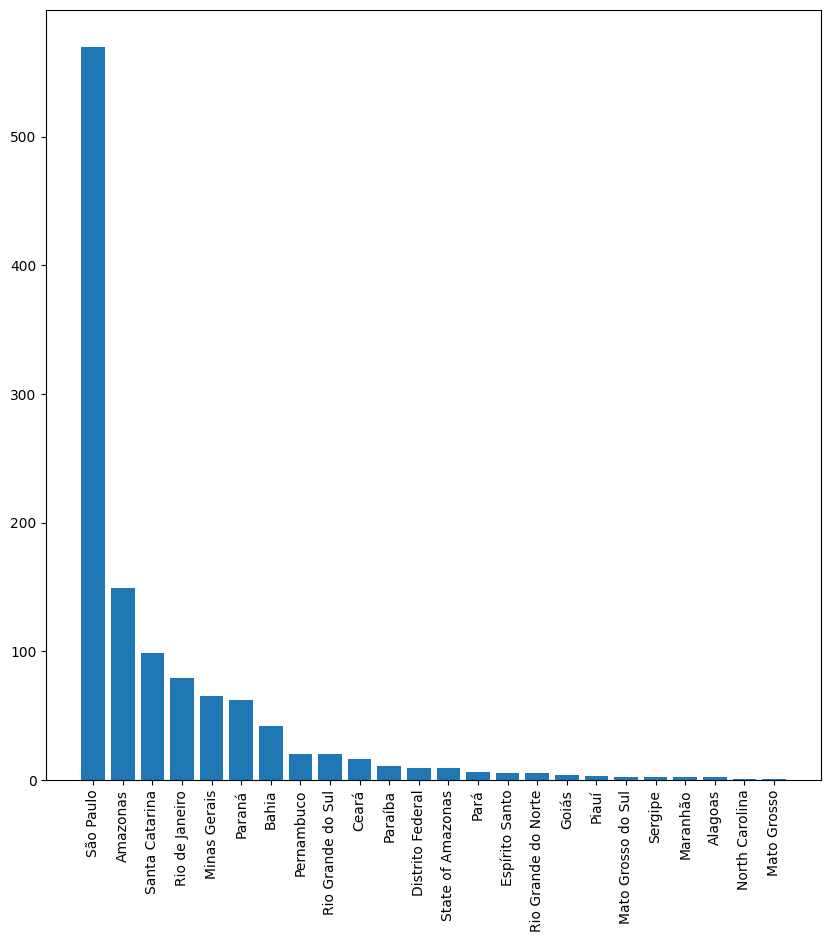

In [2124]:
vc = df['state'].value_counts()
plt.figure(figsize=(10,10))
plt.bar(vc.index,vc.values)
plt.xticks(rotation=90)
plt.show()

Grande maioria dos usuários são situados em São Paulo.

### Faltas Psicoterapia - 

Contagem das faltas considerando apenas as sessões de psicoterapia. Se alguém acabar por faltar bastante, pode indicar alguma insatisfação com o serviço ou insegurança com o processo de terapia.

Há apenas 180 valores não nulos

In [2125]:
df['Faltas Psicoterapia'].dropna()

28       1.0
50       8.0
55      12.0
65       1.0
72       2.0
        ... 
1104     2.0
1105     1.0
1110     1.0
1137     1.0
1141     1.0
Name: Faltas Psicoterapia, Length: 180, dtype: float64

<AxesSubplot: >

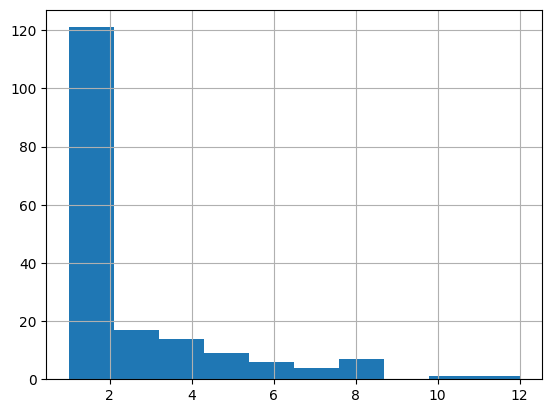

In [2126]:
df['Faltas Psicoterapia'].hist()

O baixo índice de faltas indica que muitas pessoas estão realmente indo aos atendimentos. O problema é que temos apenas 180 amostras não nulas no dataset, se não seria uma informação relevante.

### Data Última Mensagens Outbound
Data da última mensagem enviada pela equipe de saúde. Se essa data for anterior à última data da mensagem enviada pelo cliente isso é um possível problema.

In [2127]:
df['Data Última Mensagens Outbound']

0       2023-01-30 16:24:27
1                       NaN
2                       NaN
3                       NaN
4                       NaN
               ...         
1196                    NaN
1197                    NaN
1198    2023-10-31 14:01:06
1199                    NaN
1200                    NaN
Name: Data Última Mensagens Outbound, Length: 1201, dtype: object

In [2128]:
df['Data Última Mensagens Outbound'].value_counts()

2022-03-24 11:55:48    5
2023-10-31 18:40:50    3
2023-10-26 07:40:52    3
2023-10-30 18:40:51    3
2023-10-03 10:33:21    3
                      ..
2023-05-22 19:28:08    1
2022-11-07 17:17:07    1
2023-10-27 18:55:34    1
2023-10-26 20:58:51    1
2023-10-31 14:01:06    1
Name: Data Última Mensagens Outbound, Length: 1125, dtype: int64

In [2129]:
df['Data Última Mensagens Outbound'] = pd.to_datetime(df['Data Última Mensagens Outbound'], format='%Y-%m-%d %H:%M:%S')
df['Data Última Mensagens Outbound']

0      2023-01-30 16:24:27
1                      NaT
2                      NaT
3                      NaT
4                      NaT
               ...        
1196                   NaT
1197                   NaT
1198   2023-10-31 14:01:06
1199                   NaT
1200                   NaT
Name: Data Última Mensagens Outbound, Length: 1201, dtype: datetime64[ns]

In [2130]:
df['Data Última Mensagens Inbound'] = pd.to_datetime(df['Data Última Mensagens Inbound'], format='%Y-%m-%d %H:%M:%S')
df['Data Última Mensagens Inbound']

0      2023-01-02 15:36:27
1                      NaT
2                      NaT
3                      NaT
4                      NaT
               ...        
1196                   NaT
1197                   NaT
1198   2023-10-31 14:01:01
1199                   NaT
1200                   NaT
Name: Data Última Mensagens Inbound, Length: 1201, dtype: datetime64[ns]

In [2131]:
filtro = df['Data Última Mensagens Inbound'] > df['Data Última Mensagens Outbound']

df[filtro]

,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
17,408,1963-10-04,63.0,82.0,São Paulo,Marília,17502-242,428.0,2379.0,2021-01-28,...,11.0,2023-06-06 07:59:43,30.0,32.0,Cartão de crédito,91.54,0.0,0.0,0.0,False
23,463,1971-02-28,64.0,82.0,NaN,NaN,NaN,NaN,NaN,2021-02-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
30,860,1998-05-06,63.0,80.0,Paraná,Londrina,86020-410,NaN,NaN,2022-06-21,...,NaN,NaN,13.0,14.0,Cartão de crédito,88.00,1.0,0.0,0.0,False
38,973,1986-10-11,64.0,80.0,Minas Gerais,Uberlândia,38405-364,412.0,NaN,2021-06-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
51,1152,1994-08-31,64.0,80.0,São Paulo,São Carlos,13569-060,NaN,NaN,2021-08-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,5877,2003-01-15,63.0,80.0,Minas Gerais,Belo Horizonte,31310-360,NaN,NaN,2023-10-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1172,5893,1983-12-02,64.0,82.0,São Paulo,São Paulo,04303-001,NaN,NaN,2023-10-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1174,5897,1994-02-12,64.0,80.0,Pernambuco,Recife,54290-050,NaN,NaN,2023-10-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1183,5914,1998-03-03,64.0,80.0,Bahia,Salvador,40230-113,NaN,NaN,2023-10-24,...,NaN,NaN,1.0,1.0,Cartão de crédito,50.00,0.0,0.0,0.0,False


Como o datafranme acima indica, 196 clientes tiveram mensagens não respondidas até agora pela central de atendimento (no momento de criação dos dados)

### Qde Atendimentos Acolhimento - 

Contagem dos atendimentos realizados com a equipe de acolhimento da Ana Health. Coluna inteira está vazia.

In [2132]:
df['Qde Atendimentos Acolhimento'].describe()

count    701.000000
mean       1.696148
std        0.748598
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        7.000000
Name: Qde Atendimentos Acolhimento, dtype: float64

### Status - Assinatura 

Status por assinatura (separada por vírgula): Cancelada (lost), Ativa (won). O que acontece se o status for nulo?

In [2133]:
df['status'].dropna()

24      lost
28      lost
30      lost
36      lost
37      lost
        ... 
1195     won
1196     won
1197     won
1199     won
1200     won
Name: status, Length: 1078, dtype: object

In [2134]:
df['status'].value_counts()

won                      558
lost                     456
lost; lost                31
lost; won                 23
lost; lost; lost           5
lost; lost; won            3
lost; lost; lost; won      2
Name: status, dtype: int64

In [2135]:
def lastStatus(x):
    s = x.split(';')
    return s[-1].strip()

status = df['status'].dropna().apply(lastStatus)

status.value_counts()

won     586
lost    492
Name: status, dtype: int64

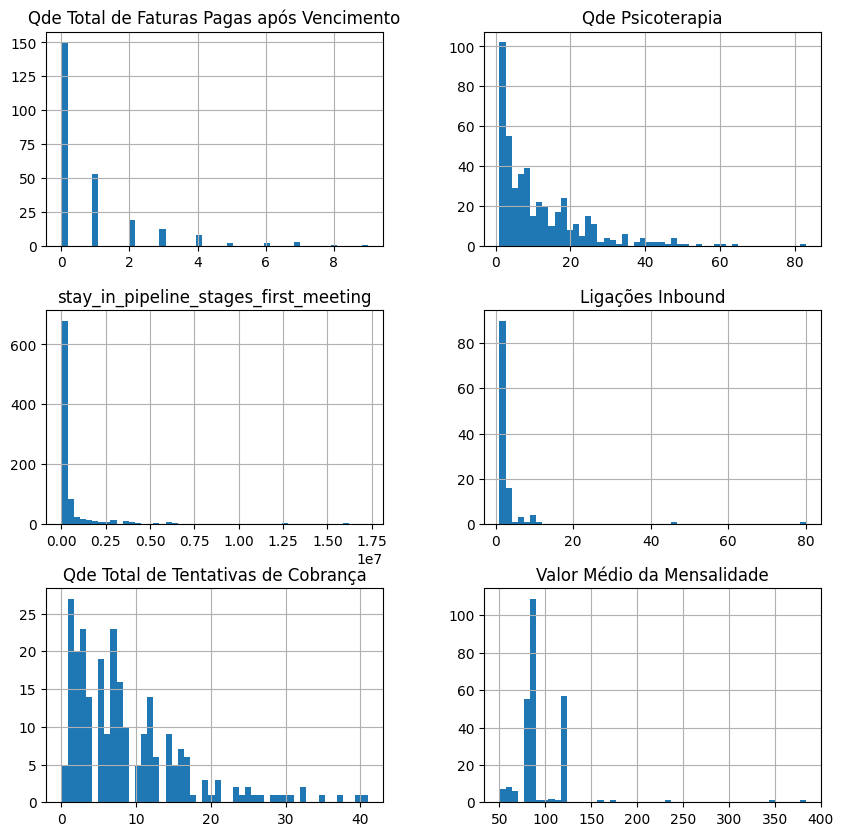

In [2136]:
df_gustavo.hist(bins=50, figsize=(10,10))
plt.show()

# Análise - Matheus

In [2137]:
df_matheus.head()

,Faltas Acolhimento,Qde Perfis de Pagamento Inativos,Datas Prescrição,Valor Total Inadimplência,id_continuity_pf,add_time,Qde Respostas WHOQOL,Datas Psicoterapia,Cancelamentos Acolhimento,won_time,Canal de Preferência,Ambiental
0,0.0,False,False,NaN,NaN,2021-09-16 18:14:49,3.0,NaN,False,2022-04-29 03:00:00,NaN,"4,0; 4,3; 4,0"
1,NaN,False,False,NaN,339.0,2021-09-16 18:15:46,NaN,NaN,False,NaN,NaN,NaN
2,NaN,False,False,NaN,339.0,NaN,NaN,NaN,False,NaN,NaN,NaN
3,NaN,False,False,NaN,339.0,NaN,NaN,NaN,False,NaN,NaN,NaN
4,NaN,False,False,NaN,339.0,NaN,NaN,NaN,False,NaN,NaN,NaN


### Descriçao do dataset

In [2138]:
df_matheus.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Faltas Acolhimento,701.0,0.208274,0.613645,0.0,0.0,0.0,0.0,5.0
Valor Total Inadimplência,252.0,24.182738,76.092674,0.0,0.0,0.0,0.0,616.0
id_continuity_pf,395.0,338.878481,0.327144,338.0,339.0,339.0,339.0,339.0
Qde Respostas WHOQOL,898.0,1.204900,0.526127,1.0,1.0,1.0,1.0,7.0
Canal de Preferência,384.0,244.635417,25.618050,238.0,239.0,239.0,239.0,360.0


### Análise dos tipos de dados

In [2139]:
df_matheus.dtypes


Faltas Acolhimento                  float64
Qde Perfis de Pagamento Inativos       bool
Datas Prescrição                       bool
Valor Total Inadimplência           float64
id_continuity_pf                    float64
add_time                             object
Qde Respostas WHOQOL                float64
Datas Psicoterapia                   object
Cancelamentos Acolhimento              bool
won_time                             object
Canal de Preferência                float64
Ambiental                            object
dtype: object

### Análise da correlação entre as colunas numéricas

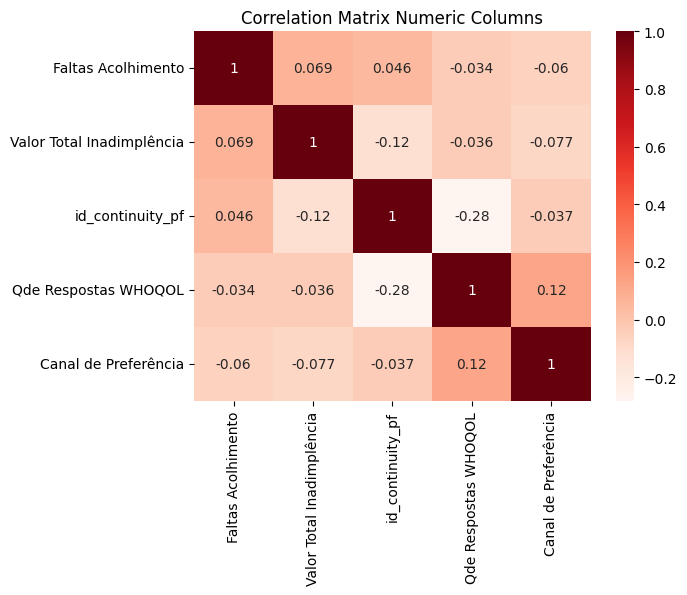

In [2140]:
correlation_matrix_numeric_columns = df_matheus.select_dtypes(include=[np.number]).corr()
plt.figure()
sns.heatmap(correlation_matrix_numeric_columns, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Matrix Numeric Columns')
plt.show()

### Análise da distribuição das colunas numéricas

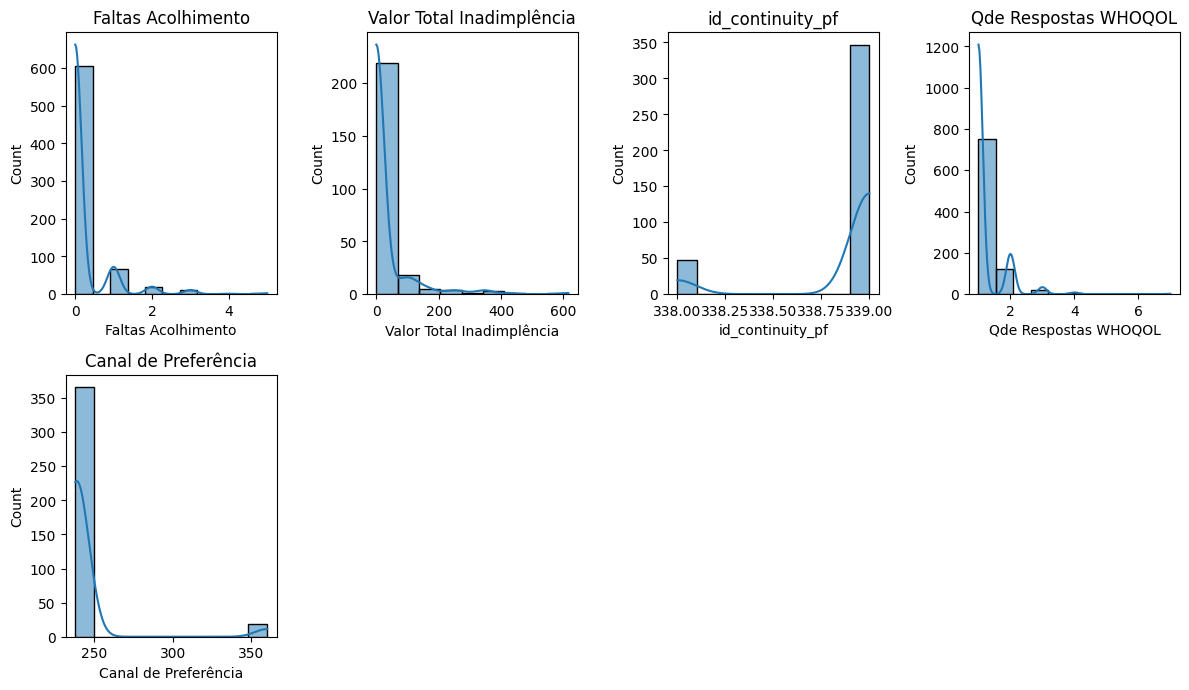

In [2141]:
colunas_numericas = df_matheus.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
for i, coluna in enumerate(colunas_numericas):
    plt.subplot(3, 4, i+1)
    sns.histplot(df_matheus[coluna], kde=True)
    plt.title(coluna)
plt.tight_layout()

### Análise da distribuição das colunas de datas agrupadas por mês de cada ano

/var/folders/8p/rd093x_n5d11j0n2nz5zfzhh0000gn/T/ipykernel_16047/969548781.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matheus[coluna] = pd.to_datetime(df_matheus[coluna], errors='coerce')
/var/folders/8p/rd093x_n5d11j0n2nz5zfzhh0000gn/T/ipykernel_16047/969548781.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matheus[new_name] = df_matheus[coluna].dt.year


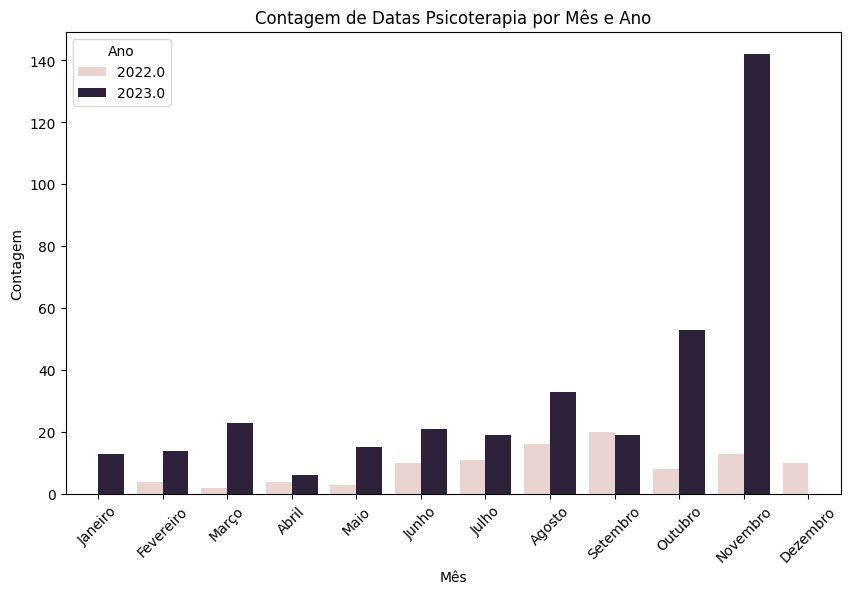

/var/folders/8p/rd093x_n5d11j0n2nz5zfzhh0000gn/T/ipykernel_16047/969548781.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matheus[coluna] = pd.to_datetime(df_matheus[coluna], errors='coerce')
/var/folders/8p/rd093x_n5d11j0n2nz5zfzhh0000gn/T/ipykernel_16047/969548781.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matheus[new_name] = df_matheus[coluna].dt.year


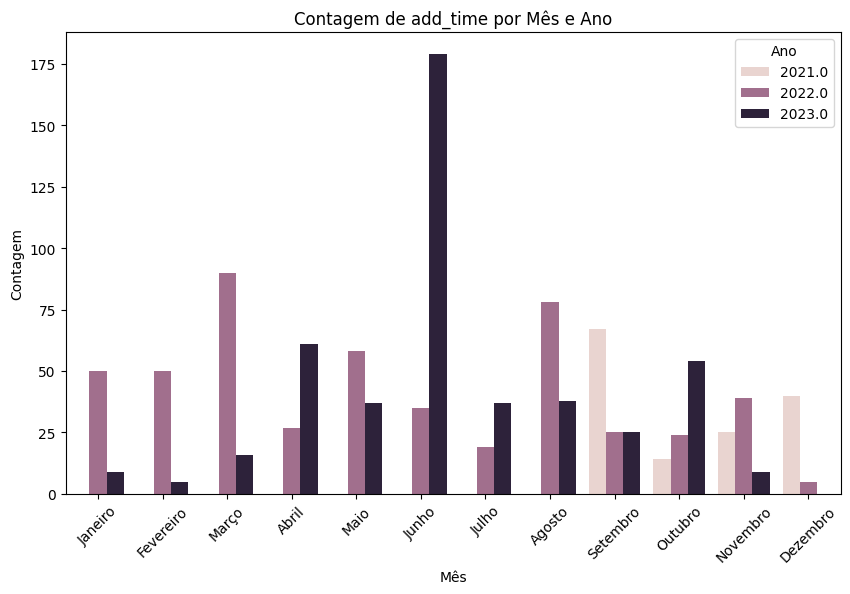

/var/folders/8p/rd093x_n5d11j0n2nz5zfzhh0000gn/T/ipykernel_16047/969548781.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matheus[coluna] = pd.to_datetime(df_matheus[coluna], errors='coerce')
/var/folders/8p/rd093x_n5d11j0n2nz5zfzhh0000gn/T/ipykernel_16047/969548781.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matheus[new_name] = df_matheus[coluna].dt.year


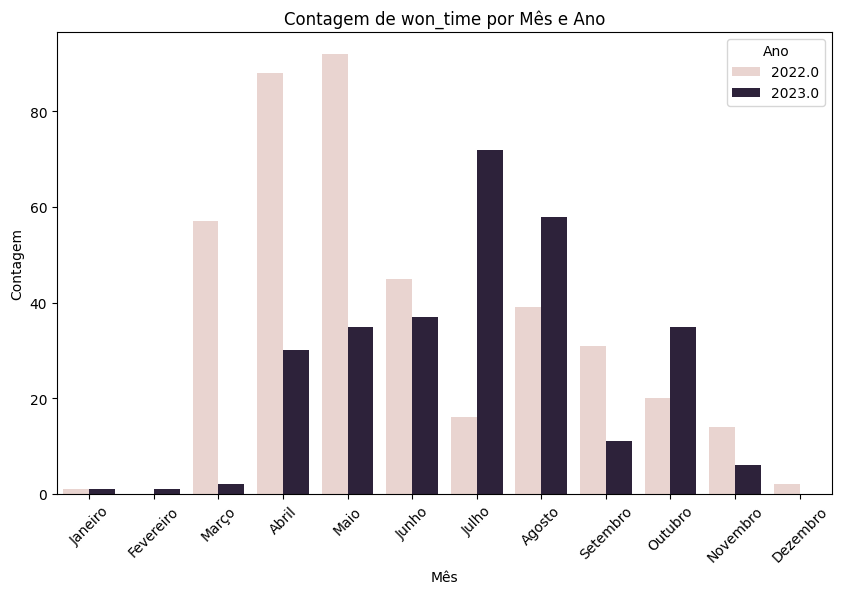

In [2142]:
#COnverter won_time  para data 

date_columns = ['Datas Psicoterapia', 'add_time','won_time']
#colocar o nome dos meses ao inves dos numeros
nome_dos_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

for coluna in date_columns:
   
    df_matheus[coluna] = pd.to_datetime(df_matheus[coluna], errors='coerce')
    df_matheus[coluna].head()
    # Criar coluna de ano
    new_name = coluna + '_year'
    df_matheus[new_name] = df_matheus[coluna].dt.year
    # Plotar gráfico de barras separado por ano
    plt.figure(figsize=(10, 6))  # Definir tamanho da figura
    # Usar seaborn para criar facetas
    sns.countplot(x=df_matheus[coluna].dt.month, hue=df_matheus[new_name])
    # Adicionar rótulos e título
    plt.xlabel('Mês')
    plt.ylabel('Contagem')
    plt.title(f'Contagem de {coluna} por Mês e Ano')
    plt.xticks(range(0, 12), nome_dos_meses, rotation=45)
    plt.legend(title='Ano')

    # Mostrar o gráfico
    plt.show()


### Análise das colunas booleanas

In [2143]:
#analise das colunas booleanas
colunas_booleanas = df_matheus.select_dtypes(include=[bool]).columns
df_matheus[colunas_booleanas].describe().transpose()

,count,unique,top,freq
Qde Perfis de Pagamento Inativos,1201,1,False,1201
Datas Prescrição,1201,1,False,1201
Cancelamentos Acolhimento,1201,1,False,1201


# Gustavo


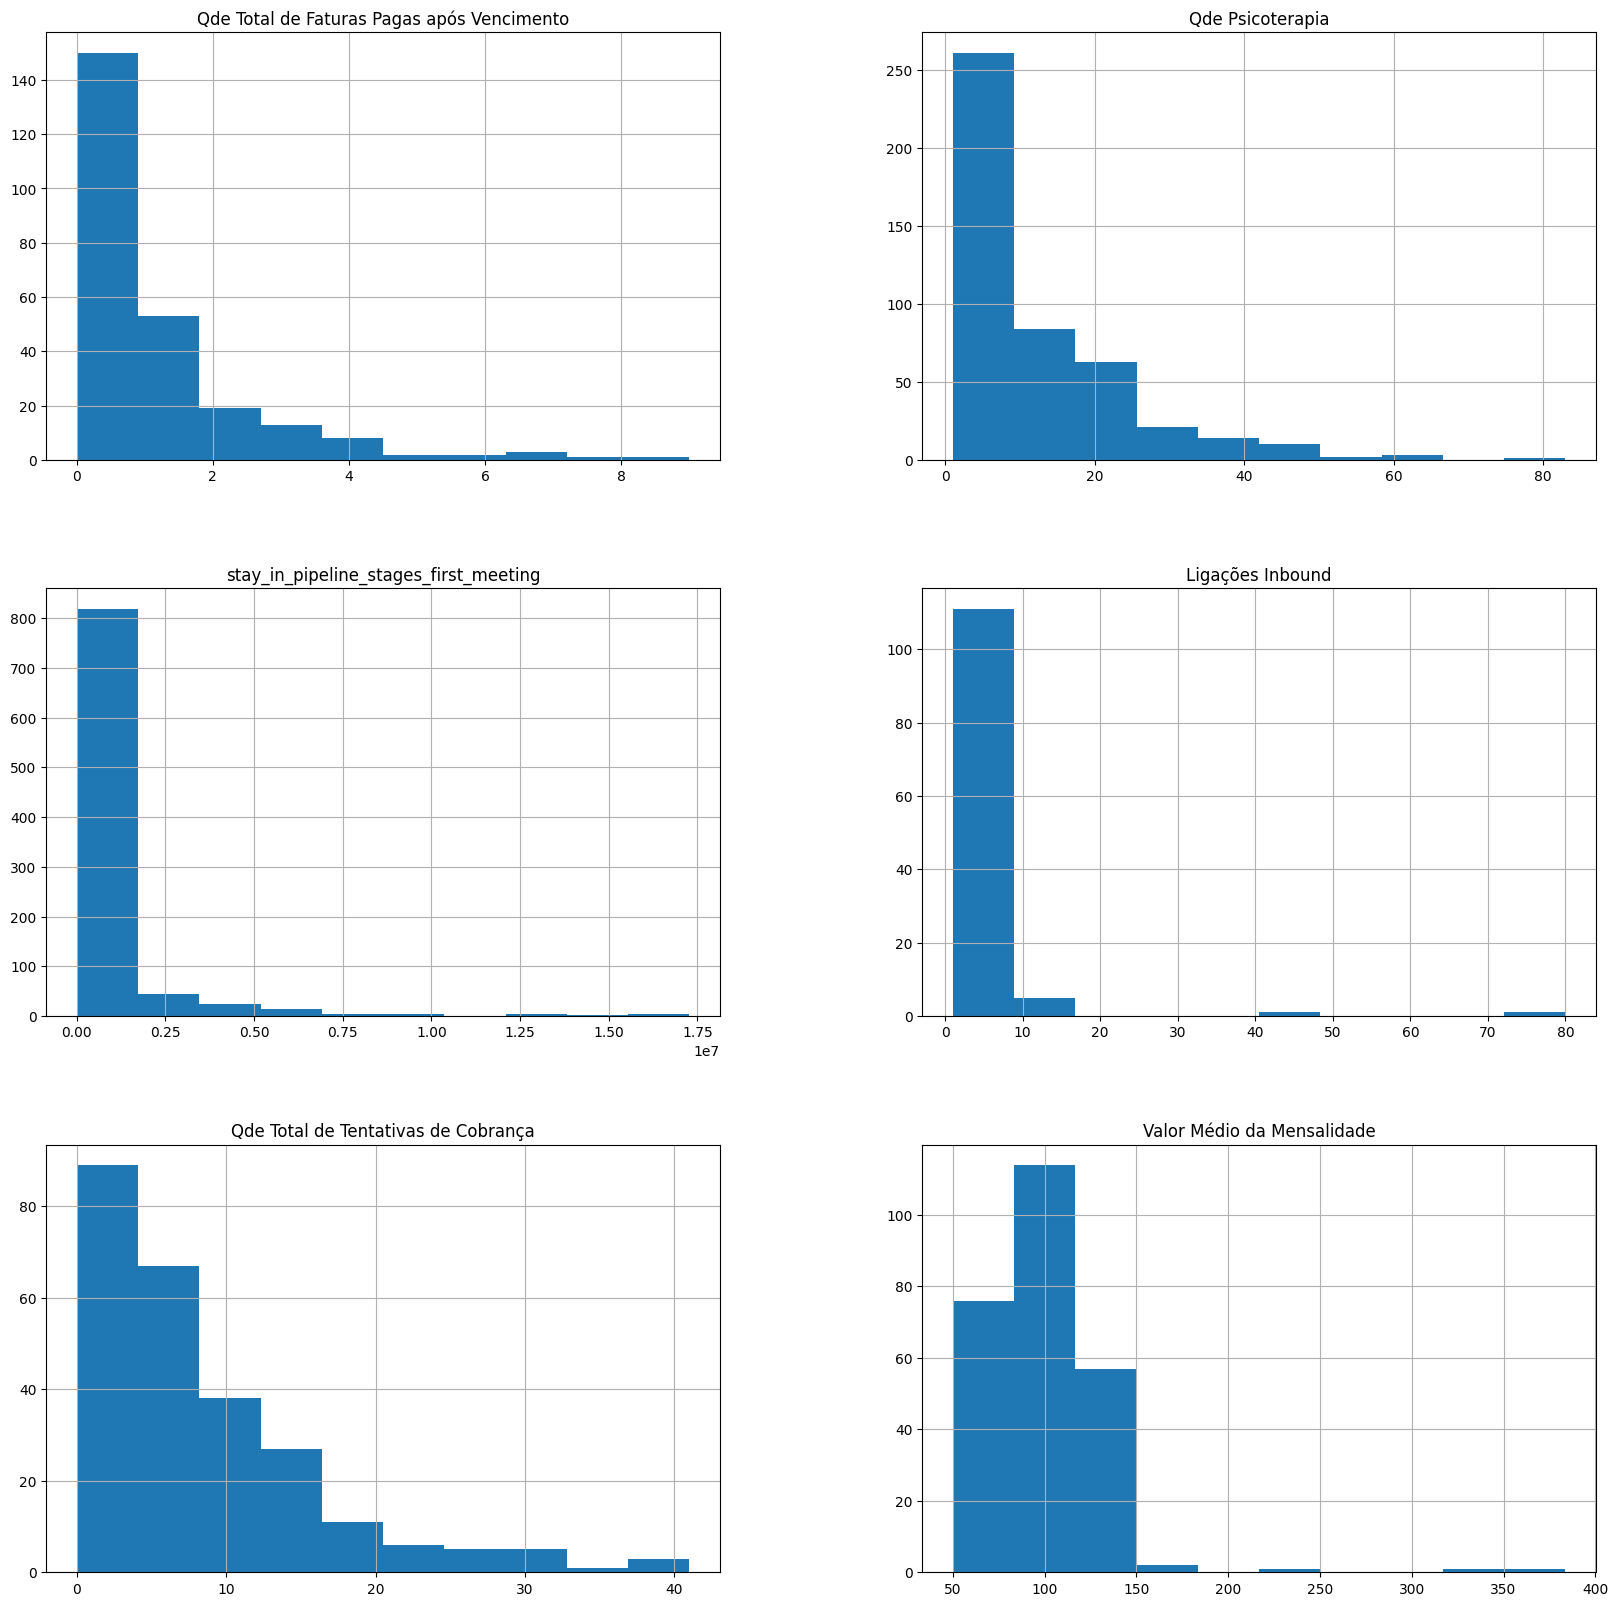

In [2144]:
df_gustavo = df[['Qde Total de Faturas Pagas após Vencimento', 'birthdate', 'Qde Psicoterapia', 'stay_in_pipeline_stages_first_meeting', 'status.1', 'Data Última Ligações Outbound', 'lost_time', 'Ligações Inbound', 'Qde Total de Tentativas de Cobrança', 'Cancelamentos Psicoterapia', 'Faltas Todos Atendimento', 'Valor Médio da Mensalidade']]
df_gustavo.hist(figsize=(20,20))
plt.show()

Coluna 'Qde Total de Faturas Pagas após Vencimento' possui muitos valores nulos, deveriamos ou preencher utilizando um mecanismo de imputer ou retirar essa coluna

In [2145]:
df_notnan = df_gustavo[df_gustavo['Qde Total de Faturas Pagas após Vencimento'].notna()]
df_notnan['Qde Total de Faturas Pagas após Vencimento'].describe()

count    252.000000
mean       0.880952
std        1.536318
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: Qde Total de Faturas Pagas após Vencimento, dtype: float64

Coluna 'birthdate' deve ser modificada para facilitar a implementação do algoritmo

In [2146]:
df_notnan = df_gustavo[df_gustavo['birthdate'].notna()]
df_notnan['birthdate'].describe()

count           1190
unique          1100
top       1995-01-16
freq               7
Name: birthdate, dtype: object

Por não existir 0 na quantidade de psicoterapia talvez os 0 sejam considerados como nan

In [2147]:
df_notnan = df_gustavo[df_gustavo['Qde Psicoterapia'].notna()]
df_notnan['Qde Psicoterapia'].describe()

count    459.000000
mean      11.775599
std       12.079602
min        1.000000
25%        3.000000
50%        8.000000
75%       17.000000
max       83.000000
Name: Qde Psicoterapia, dtype: float64

Tempo até responder o questionário de qualidade de vida.
Qual a medida de tempo?

In [2148]:
df_notnan = df_gustavo[df_gustavo['stay_in_pipeline_stages_first_meeting'].notna()]
df_notnan['stay_in_pipeline_stages_first_meeting'].describe()

/Users/marcelomarchetto/Library/Python/3.11/lib/python/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


count    9.240000e+02
mean     7.500847e+05
std      2.126858e+06
min      0.000000e+00
25%      3.502500e+02
50%      4.671000e+03
75%      3.804052e+05
max      1.727560e+07
Name: stay_in_pipeline_stages_first_meeting, dtype: float64

Status do processo de onboarding: Aberto, Perdido, Ganho
Dados estão ok pode dropar as linhas que não tem status ou fazer um imputer

In [2149]:
df_notnan = df_gustavo[df_gustavo['status.1'].notna()]
df_notnan['status.1'].describe()

count     1116
unique       3
top        won
freq       693
Name: status.1, dtype: object

Pouquissimos dados, talvez o melhor seja dropar a coluna

In [2150]:
df_notnan = df_gustavo[df_gustavo['Data Última Ligações Outbound'].notna()]
df_notnan['Data Última Ligações Outbound'].describe()

count                     579
unique                    575
top       2022-12-22 19:46:59
freq                        3
Name: Data Última Ligações Outbound, dtype: object

Pouquissimos dados, talvez o melhor seja dropar a coluna

In [2151]:
df_notnan = df_gustavo[df_gustavo['lost_time'].notna()]
df_notnan['lost_time'].describe()

count                     519
unique                    278
top       2022-09-11 03:00:00
freq                       61
Name: lost_time, dtype: object

Pouquissimos dados, talvez o melhor seja dropar a coluna

In [2152]:
df_notnan = df_gustavo[df_gustavo['Ligações Inbound'].notna()]
df_notnan['Ligações Inbound'].describe()

count    118.000000
mean       3.144068
std        8.482537
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       80.000000
Name: Ligações Inbound, dtype: float64

Pouquissimos dados, talvez o melhor seja dropar a coluna

In [2153]:
df_notnan = df_gustavo[df_gustavo['Qde Total de Tentativas de Cobrança'].notna()]
df_notnan['Qde Total de Tentativas de Cobrança'].describe()

count    252.000000
mean       8.714286
std        7.736556
min        0.000000
25%        3.000000
50%        7.000000
75%       12.000000
max       41.000000
Name: Qde Total de Tentativas de Cobrança, dtype: float64

Todos são iguais deve dropar

In [2154]:
df_notnan = df_gustavo[df_gustavo['Cancelamentos Psicoterapia'].notna()]
df_notnan['Cancelamentos Psicoterapia'].describe()

count      1201
unique        1
top       False
freq       1201
Name: Cancelamentos Psicoterapia, dtype: object

Todos são iguais deve dropar

In [2155]:
df_notnan = df_gustavo[df_gustavo['Faltas Todos Atendimento'].notna()]
df_notnan['Faltas Todos Atendimento'].describe()

count      1201
unique        1
top       False
freq       1201
Name: Faltas Todos Atendimento, dtype: object

Poucos Valores

In [2156]:
df_notnan = df_gustavo[df_gustavo['Valor Médio da Mensalidade'].notna()]
df_notnan['Valor Médio da Mensalidade'].describe()

count    252.000000
mean      94.484683
std       32.399305
min       50.000000
25%       78.000000
50%       88.000000
75%      111.100000
max      383.750000
Name: Valor Médio da Mensalidade, dtype: float64

# Marcelo

In [2157]:
df_marcelo.head()

,Interesses,id_health_plan,Cancelamentos Todos Atendimento,id_person,Social,city,id_person_recommendation,postal_code,contract_start_date,lost_time.1,contract_end_date,stay_in_pipeline_stages_welcome
0,NaN,417.0,False,250,"4,0; 4,0; 3,7",São Paulo,NaN,04534-020,2021-01-28,NaN,NaN,0.0
1,NaN,NaN,False,254,NaN,Mecklenburg County,NaN,28203,2020-12-16,2022-01-25 02:52:00,2021-11-18,9616671.0
2,NaN,NaN,False,314,NaN,São Paulo,NaN,05337-030,2021-01-21,NaN,2021-03-16,NaN
3,NaN,NaN,False,315,NaN,NaN,NaN,NaN,2020-12-17,NaN,2021-04-27,NaN
4,NaN,NaN,False,317,NaN,São Paulo,NaN,05421-050,2021-01-18,NaN,2021-03-16,NaN


In [2158]:
df_marcelo.isnull().sum()

Interesses                         1139
id_health_plan                      677
Cancelamentos Todos Atendimento       0
id_person                             0
Social                              303
city                                 19
id_person_recommendation           1091
postal_code                          39
contract_start_date                   0
lost_time.1                         884
contract_end_date                   637
stay_in_pipeline_stages_welcome      85
dtype: int64

In [2159]:
# dropar colunas Intersses, 
df_marcelo = df_marcelo.drop(['Interesses'], axis=1)

In [2160]:
df_marcelo['Cancelamentos Todos Atendimento'].value_counts()

False    1201
Name: Cancelamentos Todos Atendimento, dtype: int64

In [2161]:
# drop Cancelamentos Todos Atendimento
df_marcelo = df_marcelo.drop(['Cancelamentos Todos Atendimento'], axis=1)

In [2162]:
df_marcelo['id_health_plan'] = df_marcelo['id_health_plan'].fillna('Nenhum')
df_marcelo['id_health_plan'] = df_marcelo['id_health_plan'].replace(412, 'SUS')


df_marcelo['id_health_plan'] = df_marcelo['id_health_plan'].apply(lambda x: 'Particular' if type(x) == float else x)
df_marcelo['id_health_plan'].value_counts()

Nenhum        677
SUS           281
Particular    243
Name: id_health_plan, dtype: int64

In [2163]:
df_marcelo["Social"] = df_marcelo["Social"].astype("str")

In [2164]:
def get_media(x):

    x = x.replace(',','.')
    s = x.split(';')
    s = [float(i) for i in s]
    return np.mean(s)

df_marcelo['Social'] = df_marcelo['Social'].apply(get_media)


In [2165]:
df_marcelo['Social'].value_counts()

4.000000    326
3.000000    221
5.000000     84
2.000000     48
3.700000     37
3.300000     23
4.300000     17
4.700000     15
2.700000     12
3.850000     12
2.300000      9
2.850000      8
4.350000      7
3.150000      7
1.000000      6
3.500000      5
4.150000      4
2.500000      4
4.650000      4
3.350000      3
3.650000      3
4.500000      3
2.650000      3
3.666667      3
3.800000      3
2.350000      3
4.850000      2
1.300000      2
3.900000      2
3.466667      2
2.900000      1
4.750000      1
3.200000      1
3.533333      1
4.075000      1
1.850000      1
3.333333      1
4.566667      1
4.250000      1
2.700000      1
1.666667      1
3.100000      1
2.766667      1
2.666667      1
1.700000      1
3.566667      1
4.200000      1
3.675000      1
3.800000      1
2.150000      1
Name: Social, dtype: int64

In [2166]:
cidades = df_marcelo['city'].value_counts()
# if city is nan, replace with other
df_marcelo['city'] = df_marcelo['city'].fillna('other')

# if the city is less than 10, replace with other
df_marcelo['city'] = df_marcelo['city'].apply(lambda x: 'other' if x in cidades[cidades < 10].index else x)

df_marcelo['city'].value_counts()

other             366
São Paulo         197
São Carlos        104
Novo Airão         96
Rio de Janeiro     62
Manaus             60
Curitiba           38
Florianópolis      37
Ribeirão Preto     31
Juiz de Fora       27
Campinas           23
Palhoça            22
Salvador           22
Belo Horizonte     17
Franca             16
São José           16
Guarulhos          15
Fortaleza          15
Recife             15
Itatiba            12
Uberlândia         10
Name: city, dtype: int64

In [2167]:
df_marcelo["id_person_recommendation"].fillna(False, inplace = True)
# if id_person_recommendation is not false, replace with true

df_marcelo["id_person_recommendation"] = df_marcelo["id_person_recommendation"].apply(lambda x: True if x != False else False)

df_marcelo["id_person_recommendation"].value_counts()

False    1091
True      110
Name: id_person_recommendation, dtype: int64

In [2168]:
df_marcelo = df_marcelo.drop(['postal_code'], axis=1)

In [2169]:

df_marcelo['contract_start_date'] = pd.to_datetime(df_marcelo['contract_start_date'])
df_marcelo['contract_end_date'] = pd.to_datetime(df_marcelo['contract_end_date'])

In [2170]:
# Convert to datetime
df_marcelo['lost_time.1'] = pd.to_datetime(df_marcelo['lost_time.1'])

# Convert to period (month)
df_marcelo['lost_time_month'] = df_marcelo['lost_time.1'].dt.to_period('M')

# Handling NaN values (you might want to replace this with a specific strategy)
# For example, leave NaN as is, or replace with a placeholder date
df_marcelo['lost_time_month'].fillna(pd.NaT, inplace=True)

# Value counts
print(df_marcelo["lost_time_month"].value_counts())


2022-05    46
2023-08    38
2023-09    25
2022-04    25
2022-06    21
2022-08    18
2023-10    17
2022-07    17
2022-11    16
2023-04    15
2022-09    14
2023-05    13
2023-06    12
2022-03     9
2022-01     7
2023-07     4
2021-10     4
2023-11     3
2022-10     3
2021-11     3
2022-02     3
2022-12     2
2023-02     2
Freq: M, Name: lost_time_month, dtype: int64


In [2171]:
df_marcelo["stay_in_pipeline_stages_welcome"].fillna(0, inplace = True)
df_marcelo["stay_in_pipeline_stages_welcome"].astype(int)
df_marcelo["stay_in_pipeline_stages_welcome"].value_counts( ascending=True)

10871693.0      1
70653.0         1
486348.0        1
605705.0        1
1058728.0       1
             ... 
235.0           2
605892.0        2
203.0           2
86651.0         2
0.0           167
Name: stay_in_pipeline_stages_welcome, Length: 1031, dtype: int64